In [ ]:
import pandas as pd
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance
from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Part 1: Feature importance: London

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
london = pd.read_csv('gdrive/MyDrive/colab_notebooks/london_sample.csv')
london

month  ...  crimes_count
0       2020-11  ...         59213
1       2019-03  ...         73572
2       2021-06  ...         63247
3       2018-02  ...         58614
4       2018-12  ...         66738
...         ...  ...           ...
199995  2018-03  ...         62817
199996  2020-08  ...         64580
199997  2021-03  ...         56772
199998  2019-04  ...         67977
199999  2019-07  ...         69256

[200000 rows x 23 columns]

In [ ]:
london['month'] = pd.to_datetime(london['month'])
london['month'] = london['month'].astype(int)

london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [ ]:
london = london.drop_duplicates(keep=False)

In [ ]:
other = pd.read_csv('gdrive/MyDrive/colab_notebooks/other_cities_sample.csv', index_col=0)
other

month  ...  crimes_count
0       2020-08-01  ...       64580.0
1       2019-12-01  ...       65919.0
2       2018-09-01  ...       64272.0
3       2020-01-01  ...       69864.0
4       2019-12-01  ...       65919.0
...            ...  ...           ...
199995  2018-06-01  ...       65393.0
199996  2021-08-01  ...       60967.0
199997  2020-09-01  ...       64442.0
199998  2020-07-01  ...       63679.0
199999  2019-07-01  ...       69256.0

[200000 rows x 23 columns]

In [ ]:
other['month'] = pd.to_datetime(other['month'])
other['month'] = other['month'].astype(int)

other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [ ]:
other = other.drop_duplicates(keep=False)

In [ ]:
# functions 
class FeatureSelectionML():

    def tts(self, X, y):
        '''
        using kfold validation as it is a better method than train_test_split
        '''

        self.X_train, self.X_test, self.y_train, self.y_test  = train_test_split(X, y, random_state=100, test_size=0.3)

        return

    def model_fitting(self, model):

      model.fit(self.X_train, self.y_train)
      y_pred = model.predict(self.X_test)

      return

fsml = FeatureSelectionML()

In [ ]:
# feature importance can be found using decision tree algos since you can derive info on how 
# relevant each feature was for making the decisions
# xGboost is used here because it is shown to be better than other methods 

X = london.iloc[:,0:22]
y = london.iloc[:,-1:]

# train test split
fsml.tts(X, y)

# setting the model
xg_london = XGBRegressor(n_estimators=100)

# fitting
fsml.model_fitting(xg_london)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


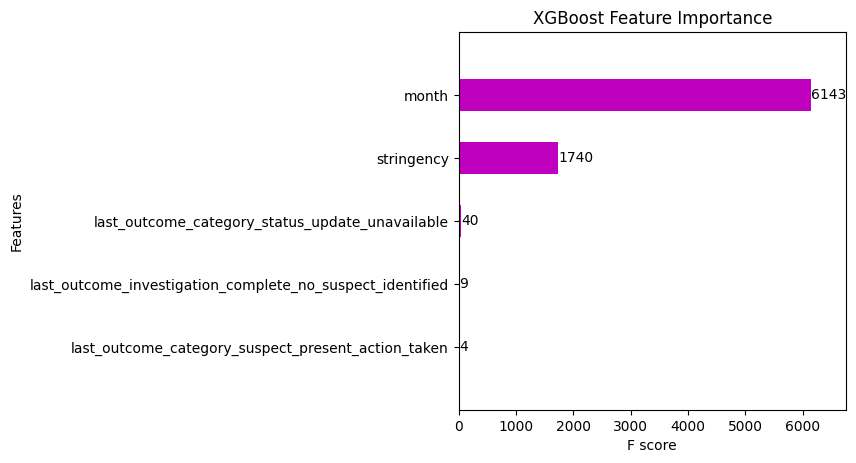

In [ ]:
# plot feature importance
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plot_importance(xg_london, ax=ax, grid=False, title='XGBoost Feature Importance', importance_type='weight', height=0.5, color='m')
plt.show()

In [ ]:
# xgboost seems to give importance to only two features so lets try random forests;

In [ ]:
# RF

# fit model 
rf_london = RandomForestRegressor(n_estimators=100)

fsml.tts(X, y)

fsml.model_fitting(rf_london)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


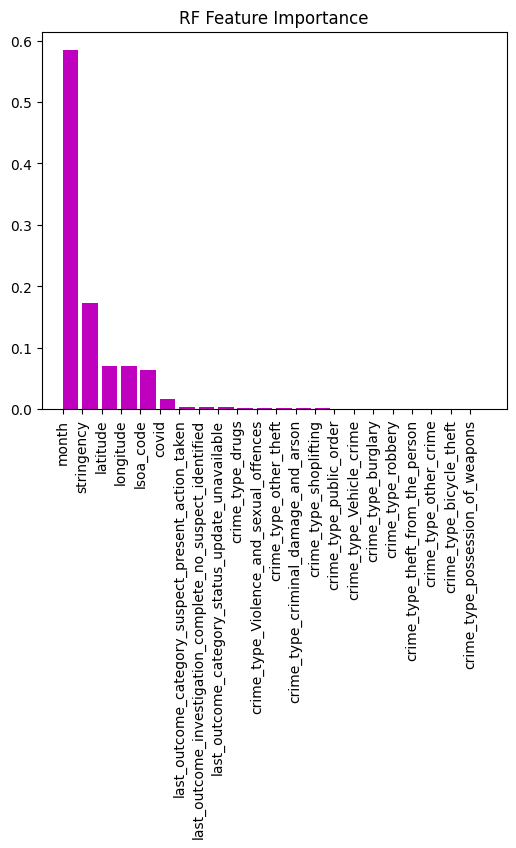

In [ ]:
feature_importance = rf_london.feature_importances_

# sorting features in descending order
sorted_feats = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6, 5), dpi=100)
plt.title('RF Feature Importance')
plt.bar(range(fsml.X_train.shape[1]), feature_importance[sorted_feats], align='edge', color='m')
plt.xticks(range(fsml.X_train.shape[1]), fsml.X_train.columns[sorted_feats], rotation=90)
plt.show()

# Feature importance: Other cities

In [ ]:
X_other = other.iloc[:,0:22]
y_other = other.iloc[:,-1:]

fsml.tts(X, y)

xg_other = XGBRegressor(n_estimators=100)
fsml.model_fitting(xg_other)

[17:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


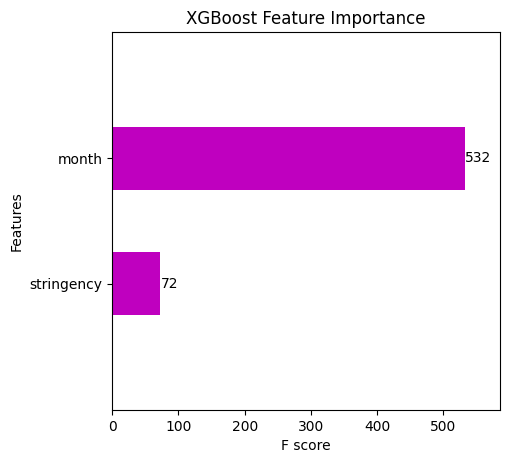

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
plot_importance(xg_other, ax=ax, grid=False, title='XGBoost Feature Importance', importance_type='weight', height=0.5, color='m')
plt.show()

In [ ]:
rf_other = RandomForestRegressor(n_estimators=100)
rf_other.fit(fsml.X_train, fsml.y_train)
y_pred = rf_other.predict(fsml.X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


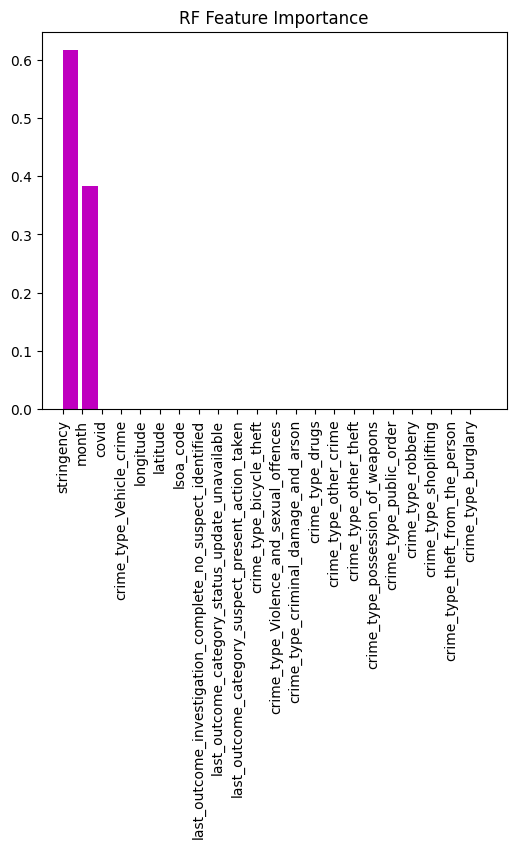

In [ ]:
feature_importance2 = rf_other.feature_importances_

sorted_feats = np.argsort(feature_importance2)[::-1]

plt.figure(figsize=(6, 5), dpi=100)
plt.title('RF Feature Importance')
plt.bar(range(fsml.X_train.shape[1]), feature_importance2[sorted_feats], align='edge', color='m')
plt.xticks(range(fsml.X_train.shape[1]), fsml.X_train.columns[sorted_feats], rotation=90)
plt.show()

# Part 2: ML

# London Regression

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from numpy import where
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# remove non important features
london = london.drop(london.iloc[:, 5:22], axis=1)
london

month  longitude  ...  stringency  crimes_count
0       1604188800000000000  -0.109323  ...     68.1007         59213
1       1551398400000000000  -0.139662  ...      0.0000         73572
2       1622505600000000000  -0.214779  ...     52.5393         63247
3       1517443200000000000  -0.037628  ...      0.0000         58614
4       1543622400000000000  -0.114509  ...      0.0000         66738
...                     ...        ...  ...         ...           ...
199995  1519862400000000000  -0.112715  ...      0.0000         62817
199996  1596240000000000000   0.035658  ...     67.5603         64580
199997  1614556800000000000  -0.368216  ...     79.5360         56772
199998  1554076800000000000  -0.096049  ...      0.0000         67977
199999  1561939200000000000  -0.396294  ...      0.0000         69256

[191030 rows x 6 columns]

In [ ]:
london = london.drop_duplicates(keep=False)
london

month  longitude  ...  stringency  crimes_count
0       1604188800000000000  -0.109323  ...     68.1007         59213
2       1622505600000000000  -0.214779  ...     52.5393         63247
3       1517443200000000000  -0.037628  ...      0.0000         58614
4       1543622400000000000  -0.114509  ...      0.0000         66738
5       1567296000000000000  -0.349878  ...      0.0000         63326
...                     ...        ...  ...         ...           ...
199992  1609459200000000000   0.092491  ...     86.8852         47958
199993  1593561600000000000  -0.313598  ...     65.1840         63679
199996  1596240000000000000   0.035658  ...     67.5603         64580
199997  1614556800000000000  -0.368216  ...     79.5360         56772
199998  1554076800000000000  -0.096049  ...      0.0000         67977

[160686 rows x 6 columns]

In [ ]:
# functions 
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.base import is_classifier, is_regressor


class ModelSplitAndEval():
    
    def split_x_y(self, df):
        '''
        splits dataset to x (features) and y (outcome/target var)
        '''
        df = pd.DataFrame(df)

        self.X = df.iloc[:, 0:5]
        # last col is the target col
        self.y = df.iloc[:, -1:]

        return self.X, self.y


    def kfold_cv(self, X, y, model):
        '''
        using kfold validation as it is a better method than train_test_split
        '''
        # prepare the cross-validation procedure
        cv = KFold(n_splits=5, shuffle=True) #random_state=100,
        
        # ensuring data is in df form
        #X = pd.DataFrame(X)
        #y = pd.DataFrame(y)
        acc_kfold = []

        for train_index, test_index in cv.split(X):
            self.X_train, self.X_test = X.iloc[train_index], X.iloc[test_index]
            self.y_train, self.y_test = y.iloc[train_index], y.iloc[test_index]
              
            
            # fitting and predicting model
            model.fit(self.X_train, self.y_train)
            self.y_pred = model.predict(self.X_test)
            acc_kfold.append(model.score(self.X_test, self.y_test))

        
        # printing accuracies
        accuracies = print('accuracies: ', acc_kfold)
        mean_ = print('mean accuracy: ', mean(acc_kfold) * 100, '%')
        std_ = print('standard deviation:', np.std(acc_kfold))
        
        # if model is regressor prints metrics for regression if not prints for classification
        if is_regressor(model):
          mae = mean_absolute_error(self.y_test, self.y_pred)
          mse = mean_squared_error(self.y_test, self.y_pred)
          r2 = r2_score(self.y_test, self.y_pred)
        
          print('mean absolute error:',mae)
          print('mean squared error:', mse)
          print('R2:', r2)

        else: 
            prec = print("Precision:", metrics.precision_score(self.y_test, self.y_pred))
            recall = print("Recall:", metrics.recall_score(self.y_test, self.y_pred))
            f1score = f1_score(self.y_test, self.y_pred, average='binary')
            print('F1 Score: %.3f' % f1score)


        return


m = ModelSplitAndEval()

In [ ]:
# checking if dataset is linear to choose the best suited ml regressor:
# we use linear regression and check the r2 score; if it is high data is linear if not then 
# it is non linear

In [ ]:
# linear regression
m.split_x_y(london)

lin_regressor1 = LinearRegression().fit(m.X, m.y)
m.kfold_cv(m.X, m.y, lin_regressor1)
# based on the r2 score our data is probably nonlinear

accuracies:  [0.5740557264837605, 0.572956129500177, 0.5661292580143991, 0.5699266990474128, 0.5718427405825512, 0.5721631097090147, 0.5751186460781896, 0.5746984727779121, 0.564632400875916, 0.5707246946764989]
mean accuracy:  57.122478777458305 %
standard deviation: 0.0033295916847464547
mean absolute error: 0.2741737123484028
mean squared error: 0.10234830151712476
R2: 0.5707246946764989


In [ ]:
# RF
# using two more ml model that work well for linear and nonlinear, rf and knn and comparing results
m.split_x_y(london)
lon_rf = RandomForestRegressor(n_estimators=10) #random_state=100
m.kfold_cv(m.X, m.y, lon_rf)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 0.0
mean squared error: 0.0
R2: 1.0


In [ ]:
# the accuracy is very high so it might be overfitting; 
# we are ensuring that there were no common rows in test and train data 
matching = m.X_test.merge(m.X_train, how = 'inner')
matching

Empty DataFrame
Columns: [month, longitude, latitude, lsoa_code, stringency]
Index: []

In [ ]:
# no leak of data from train to test

In [ ]:
# KNN
sc = MinMaxScaler()
london = sc.fit_transform(london)

m.split_x_y(london)
lon_knn = KNeighborsRegressor(n_neighbors=3,
#                           algorithm='ball_tree',
#                           leaf_size=30,
                          p=1,
                          metric='minkowski',
                          weights='distance',
                         )

m.kfold_cv(m.X, m.y, lon_knn)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 3.5783710299562e-12
mean squared error: 3.9709519123982065e-23
R2: 1.0


# Other Cities

In [ ]:
other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190788 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      190788 non-null  int64  
 1   longitude                                                  190788 non-null  float64
 2   latitude                                                   190788 non-null  float64
 3   lsoa_code                                                  190788 non-null  int64  
 4   stringency                                                 190788 non-null  float64
 5   covid                                                      190788 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  190788 non-null  int64  
 7   last_outcome_category_status_update_unavailable            190788 non-null  int64  

In [ ]:
# for other cities we remove the non important features first
# feature selection with rf and xgboost showed only month and stringency to be important for predicting crime count 
# rf does well even with the non important features inncluded but knn doesn't

In [ ]:
other_important_only = other.drop(columns=['longitude', 'latitude', 'covid'])
other_important_only

# we are keeping lsoa code even though it was non-important feature because if we remove it the unique rows are only
# going to be 45. Since month stringency and crime are the sum of each month

month  ...  crimes_count
0       1596240000000000000  ...       64580.0
1       1575158400000000000  ...       65919.0
2       1535760000000000000  ...       64272.0
3       1577836800000000000  ...       69864.0
4       1575158400000000000  ...       65919.0
...                     ...  ...           ...
199994  1546300800000000000  ...       67773.0
199995  1527811200000000000  ...       65393.0
199996  1627776000000000000  ...       60967.0
199998  1593561600000000000  ...       63679.0
199999  1561939200000000000  ...       69256.0

[190788 rows x 20 columns]

In [ ]:
other_important_only = other_important_only.drop(other_important_only.iloc[:, 3:19], axis=1)
other_important_only

month  lsoa_code  stringency  crimes_count
0       1596240000000000000    1002565     67.5603       64580.0
1       1575158400000000000    1003728      0.0000       65919.0
2       1535760000000000000    1000635      0.0000       64272.0
3       1577836800000000000    1004503      0.0000       69864.0
4       1575158400000000000    1004564      0.0000       65919.0
...                     ...        ...         ...           ...
199994  1546300800000000000    1004714      0.0000       67773.0
199995  1527811200000000000    1000864      0.0000       65393.0
199996  1627776000000000000    1004644     43.9800       60967.0
199998  1593561600000000000    1001943     65.1840       63679.0
199999  1561939200000000000    1003212      0.0000       69256.0

[190788 rows x 4 columns]

In [ ]:
other_no_dups = other_important_only.drop_duplicates()
other_no_dups.shape
# with lsoa code our rows are 130k

(108826, 4)

In [ ]:
# checking for linearity
m.split_x_y(other_no_dups)
lin_regressor2 = LinearRegression().fit(m.X, m.y)
m.kfold_cv(m.X, m.y, lin_regressor2)
# data is linear probably because long, lat and covid was not included 

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 2.5566976261555176e-12
mean squared error: 3.266612819212398e-23
R2: 1.0


In [ ]:
# RF
m.split_x_y(other_no_dups)
other_rf = RandomForestRegressor(n_estimators=100, random_state=100)
m.kfold_cv(m.X, m.y, other_rf)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
mean absolute error: 0.0
mean squared error: 0.0
R2: 1.0


In [ ]:
# as we can see the ml models are probably overfitting. that is likely because the 
# y target has many repeating values since it is the average crime count over each month
# if we keep only the unique we would have just 45 rows which is impossible to do ml on.
# so our second best option is to try and predict covid (if a crime occured during covid or before) 
# using classification instead of crime count using regression
# since we already see that covid has an effect on crime from the plots and correlations

# Classification on covid as target
# Preparing data



In [ ]:
# feature analysis shows stringency and month to be the most important features
# so we drop long lat but we keep lsoa code for reason described above

In [ ]:
# had to repeat the same process because covid col was removed from the data for regression
london_clf = pd.read_csv('gdrive/MyDrive/colab_notebooks/london_sample.csv')
london_clf['month'] = pd.to_datetime(london_clf['month'])
london_clf['month'] = london_clf['month'].astype(int)
london_clf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [ ]:
last_column = london_clf.pop('covid')
london_clf.insert(22, 'covid', last_column)
london_clf

month  longitude  ...  crimes_count  covid
0       1604188800000000000  -0.109323  ...         59213      1
1       1551398400000000000  -0.139662  ...         73572      0
2       1622505600000000000  -0.214779  ...         63247      1
3       1517443200000000000  -0.037628  ...         58614      0
4       1543622400000000000  -0.114509  ...         66738      0
...                     ...        ...  ...           ...    ...
199995  1519862400000000000  -0.112715  ...         62817      0
199996  1596240000000000000   0.035658  ...         64580      1
199997  1614556800000000000  -0.368216  ...         56772      1
199998  1554076800000000000  -0.096049  ...         67977      0
199999  1561939200000000000  -0.396294  ...         69256      0

[200000 rows x 23 columns]

In [ ]:
# remove non important features
london_clf = london_clf.drop(london_clf.iloc[:, 5:21], axis=1)
london_clf = london_clf.drop(london_clf.iloc[:, 1:3], axis=1)

london_clf

month  lsoa_code  stringency  crimes_count  covid
0       1604188800000000000    1003045     68.1007         59213      1
1       1551398400000000000    1033595      0.0000         73572      0
2       1622505600000000000    1004635     52.5393         63247      1
3       1517443200000000000    1001504      0.0000         58614      0
4       1543622400000000000    1001172      0.0000         66738      0
...                     ...        ...         ...           ...    ...
199995  1519862400000000000    1001971      0.0000         62817      0
199996  1596240000000000000    1003795     67.5603         64580      1
199997  1614556800000000000    1002206     79.5360         56772      1
199998  1554076800000000000    1001045      0.0000         67977      0
199999  1561939200000000000    1002417      0.0000         69256      0

[200000 rows x 5 columns]

In [ ]:
london_clf = london_clf.drop_duplicates(keep=False)
london_clf

month  lsoa_code  stringency  crimes_count  covid
2       1622505600000000000    1004635     52.5393         63247      1
5       1567296000000000000    1001260      0.0000         63326      0
6       1533081600000000000    1004011      0.0000         64528      0
7       1525132800000000000    1002309      0.0000         66002      0
8       1530403200000000000    1004015      0.0000         69301      0
...                     ...        ...         ...           ...    ...
199990  1535760000000000000    1001346      0.0000         64272      0
199992  1609459200000000000    1033741     86.8852         47958      1
199993  1593561600000000000    1002941     65.1840         63679      1
199996  1596240000000000000    1003795     67.5603         64580      1
199997  1614556800000000000    1002206     79.5360         56772      1

[65606 rows x 5 columns]

In [ ]:
# first we have to ensure that the data is balanced between the two classes
m.split_x_y(london)

def check_balance(df):
  
  total = len(df)
  balance_1 = df[df['covid'] == 1].count()
  print(balance_1)
  balance_0 = df[df['covid'] == 0].count()
  percentage1 = (balance_1 / total) * 100
  perecentage0 = (balance_0 / total) * 100
  

  return perecentage0, percentage1

In [ ]:
check_balance(london_clf)
# split is 41-58

month           27534
lsoa_code       27534
stringency      27534
crimes_count    27534
covid           27534
dtype: int64


(month           58.031278
 lsoa_code       58.031278
 stringency      58.031278
 crimes_count    58.031278
 covid           58.031278
 dtype: float64, month           41.968722
 lsoa_code       41.968722
 stringency      41.968722
 crimes_count    41.968722
 covid           41.968722
 dtype: float64)

# London classification



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

class FiguresForClassification():
      
  def confusion_matrix_plot(self, X_test, y_test, y_pred, model):

    '''
    plots a confusion matrix
    '''

    conf_matrix = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(4, 2), dpi=200)
    conf_matrix_plt = plot_confusion_matrix(model,
                                        X_test,
                                        y_test,
                                        cmap=plt.cm.RdPu, # RdPu
                                        normalize='true',
                                        ax=ax)

    plt.title('Confusion Matrix ({})'.format(model))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show(conf_matrix_plt)

    plt.show()

    return

clf_plots = FiguresForClassification()

In [ ]:
#RF
m.split_x_y(london_clf)
lon_clf_rf = RandomForestClassifier(n_estimators=100) #, random_state=100
m.kfold_cv(m.X, m.y, lon_clf_rf)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


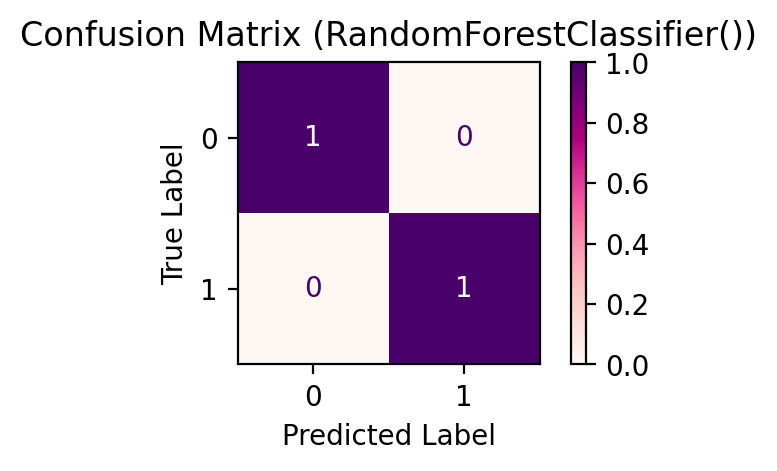

In [ ]:
#confusion matrix rf
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, lon_clf_rf)

In [ ]:
# checking if removing month col improves results since covid and month give roughly the same info

london_nomonth = london_clf.drop(columns=['month'])
london_nomonth

lsoa_code  stringency  crimes_count  covid
2         1004635     52.5393         63247      1
5         1001260      0.0000         63326      0
6         1004011      0.0000         64528      0
7         1002309      0.0000         66002      0
8         1004015      0.0000         69301      0
...           ...         ...           ...    ...
199990    1001346      0.0000         64272      0
199992    1033741     86.8852         47958      1
199993    1002941     65.1840         63679      1
199996    1003795     67.5603         64580      1
199997    1002206     79.5360         56772      1

[65606 rows x 4 columns]

In [ ]:
#RF
m.split_x_y(london_nomonth)
lon_clf_nm = RandomForestClassifier(n_estimators=10, bootstrap=True) #, random_state=100
# setting min_weight_fraction_leaf=0.5 gives 0.58 accuracy so the model does become worse with 
# bad tuning
m.kfold_cv(m.X, m.y, lon_clf_nm)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


In [ ]:
# checking to see if any of the rain data was leaked to the test data
matching2 = m.X_test.merge(m.X_train, how = 'inner')
matching2

Empty DataFrame
Columns: [lsoa_code, stringency, crimes_count, covid]
Index: []

In [ ]:
#KNN
sc = MinMaxScaler()
london_clf = sc.fit_transform(london_clf)

m.split_x_y(london_clf)

lon_clf_knn = KNeighborsClassifier(n_neighbors=5,
#                           algorithm='ball_tree',
#                           leaf_size=30,
                          p=2,
                          metric='minkowski',
                          weights='distance',
                         )

m.kfold_cv(m.X, m.y, lon_clf_knn)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


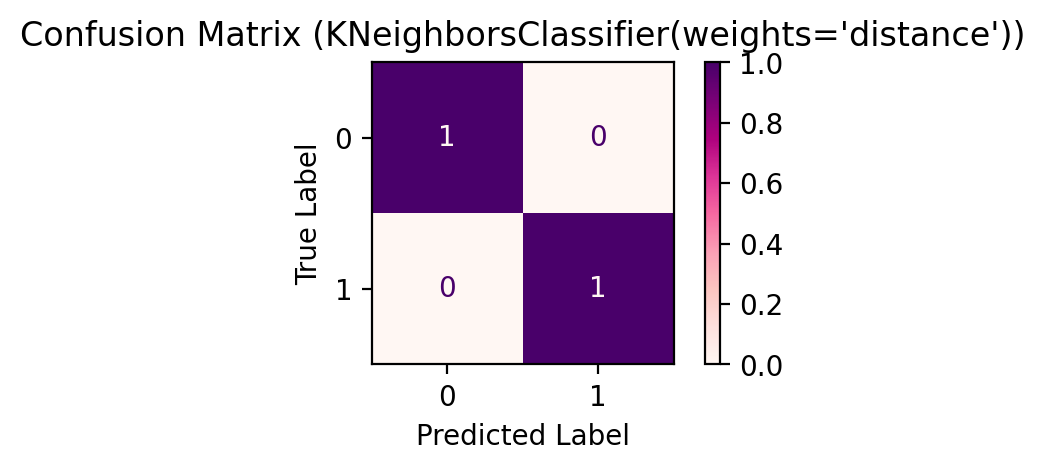

In [ ]:
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, lon_clf_knn)

In [ ]:
matching2 = m.X_test.merge(m.X_train, how = 'inner')
matching2

Empty DataFrame
Columns: [month, lsoa_code, stringency, crimes_count, covid]
Index: []

# Other cities classification 

In [ ]:
other_clf = pd.read_csv('gdrive/MyDrive/colab_notebooks/other_cities_sample.csv', index_col=0)
other_clf['month'] = pd.to_datetime(other_clf['month'])
other_clf['month'] = other_clf['month'].astype(int)
other_clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   month                                                      200000 non-null  int64  
 1   longitude                                                  200000 non-null  float64
 2   latitude                                                   200000 non-null  float64
 3   lsoa_code                                                  200000 non-null  int64  
 4   stringency                                                 200000 non-null  float64
 5   covid                                                      200000 non-null  int64  
 6   last_outcome_investigation_complete_no_suspect_identified  200000 non-null  int64  
 7   last_outcome_category_status_update_unavailable            200000 non-null  int64  

In [ ]:
last_column = other_clf.pop('covid')
other_clf.insert(22, 'covid', last_column)
other_clf

month  longitude  ...  crimes_count  covid
0       1596240000000000000  -0.309091  ...       64580.0      1
1       1575158400000000000   0.069631  ...       65919.0      0
2       1535760000000000000  -0.291239  ...       64272.0      0
3       1577836800000000000  -0.210964  ...       69864.0      0
4       1575158400000000000  -0.147038  ...       65919.0      0
...                     ...        ...  ...           ...    ...
199995  1527811200000000000  -0.127242  ...       65393.0      0
199996  1627776000000000000  -0.241744  ...       60967.0      1
199997  1598918400000000000  -0.006373  ...       64442.0      1
199998  1593561600000000000  -0.219236  ...       63679.0      1
199999  1561939200000000000  -0.034764  ...       69256.0      0

[200000 rows x 23 columns]

In [ ]:
# remove non important features
other_clf = other_clf.drop(other_clf.iloc[:, 5:21], axis=1)
other_clf = other_clf.drop(other_clf.iloc[:, 1:3], axis=1)

other_clf

month  lsoa_code  stringency  crimes_count  covid
0       1596240000000000000    1002565     67.5603       64580.0      1
1       1575158400000000000    1003728      0.0000       65919.0      0
2       1535760000000000000    1000635      0.0000       64272.0      0
3       1577836800000000000    1004503      0.0000       69864.0      0
4       1575158400000000000    1004564      0.0000       65919.0      0
...                     ...        ...         ...           ...    ...
199995  1527811200000000000    1000864      0.0000       65393.0      0
199996  1627776000000000000    1004644     43.9800       60967.0      1
199997  1598918400000000000    1004466     65.6114       64442.0      1
199998  1593561600000000000    1001943     65.1840       63679.0      1
199999  1561939200000000000    1003212      0.0000       69256.0      0

[200000 rows x 5 columns]

In [ ]:
other_clf = other_clf.drop_duplicates(keep=False)
other_clf

month  lsoa_code  stringency  crimes_count  covid
3       1577836800000000000    1004503      0.0000       69864.0      0
4       1575158400000000000    1004564      0.0000       65919.0      0
5       1561939200000000000    1004424      0.0000       69256.0      0
6       1546300800000000000    1000697      0.0000       67773.0      0
7       1601510400000000000    1004539     67.9013       64270.0      1
...                     ...        ...         ...           ...    ...
199988  1622505600000000000    1002011     52.5393       63247.0      1
199990  1522540800000000000    1003138      0.0000       62269.0      0
199993  1543622400000000000    1002041      0.0000       66738.0      0
199996  1627776000000000000    1004644     43.9800       60967.0      1
199999  1561939200000000000    1003212      0.0000       69256.0      0

[65390 rows x 5 columns]

In [ ]:
# rf
from sklearn.metrics import accuracy_score

m.split_x_y(other_clf)
other_clf_rf = RandomForestClassifier(n_estimators=100) #random_state=100
m.kfold_cv(m.X, m.y, other_clf_rf)
print('acc_score', accuracy_score(m.y_test, m.y_pred))


accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000
acc_score 1.0


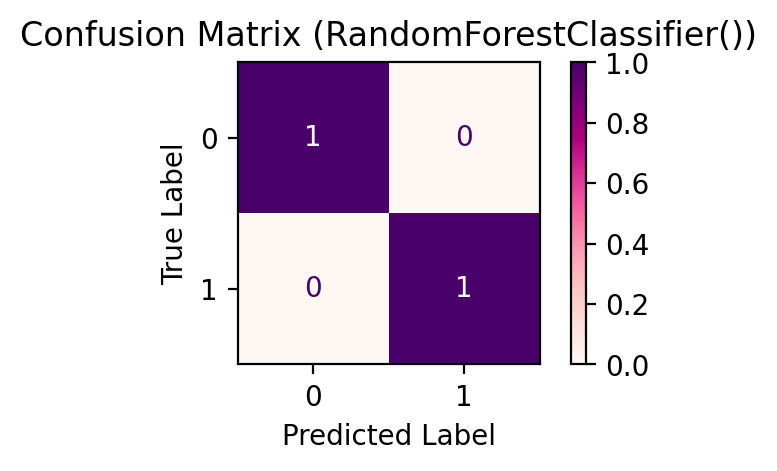

In [ ]:
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, other_clf_rf)

In [ ]:
matching2 = m.X_test.merge(m.X_train, how = 'inner')
matching2

Empty DataFrame
Columns: [month, lsoa_code, stringency, crimes_count, covid]
Index: []

In [ ]:
#KNN
sc = MinMaxScaler()
other_clf = sc.fit_transform(other_clf)

m.split_x_y(other_clf)
other_clf_knn = KNeighborsClassifier(n_neighbors=5,
#                           algorithm='ball_tree',
#                           leaf_size=30,
                          p=2,
                          metric='minkowski',
                          weights='distance',
                         )

m.kfold_cv(m.X, m.y, other_clf_knn)

accuracies:  [1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  100.0 %
standard deviation: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.000


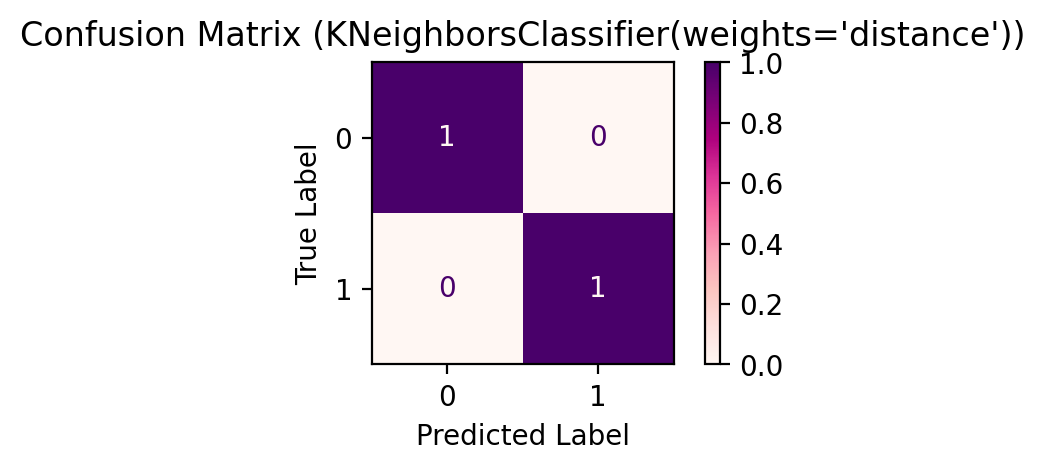

In [ ]:
#confusion matrix knn
clf_plots.confusion_matrix_plot(m.X_test, m.y_test, m.y_pred, other_clf_knn)

# Part 3: Clustering

In [ ]:
# one last thing we can examine is clustering which is an unsupervised ML algorithm
# we can see if the algorithm (kmeans) forms different clusters for before and after covid for our data 
# since clustering forms clusters based on similarity it might be able to 
# to pick up the differences before and during covid and form clusters

# London

In [ ]:
london

month  ...  crimes_count
0       1604188800000000000  ...         59213
1       1551398400000000000  ...         73572
2       1622505600000000000  ...         63247
3       1517443200000000000  ...         58614
4       1543622400000000000  ...         66738
...                     ...  ...           ...
199995  1519862400000000000  ...         62817
199996  1596240000000000000  ...         64580
199997  1614556800000000000  ...         56772
199998  1554076800000000000  ...         67977
199999  1561939200000000000  ...         69256

[191030 rows x 23 columns]

In [ ]:
# corelation matrix for each cluster
def corr_matrix(df, linewidth, **kwargs):

  plt.figure(figsize=(18,12), dpi=200)
  df_corr=df.corr()
  sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, linewidth=linewidth)
  plt.show()

  return

In [ ]:
# we remove the crime types and outcome cols as upon testing they made the model perform  worse
# and also they were found to be non-important during feature analysis 

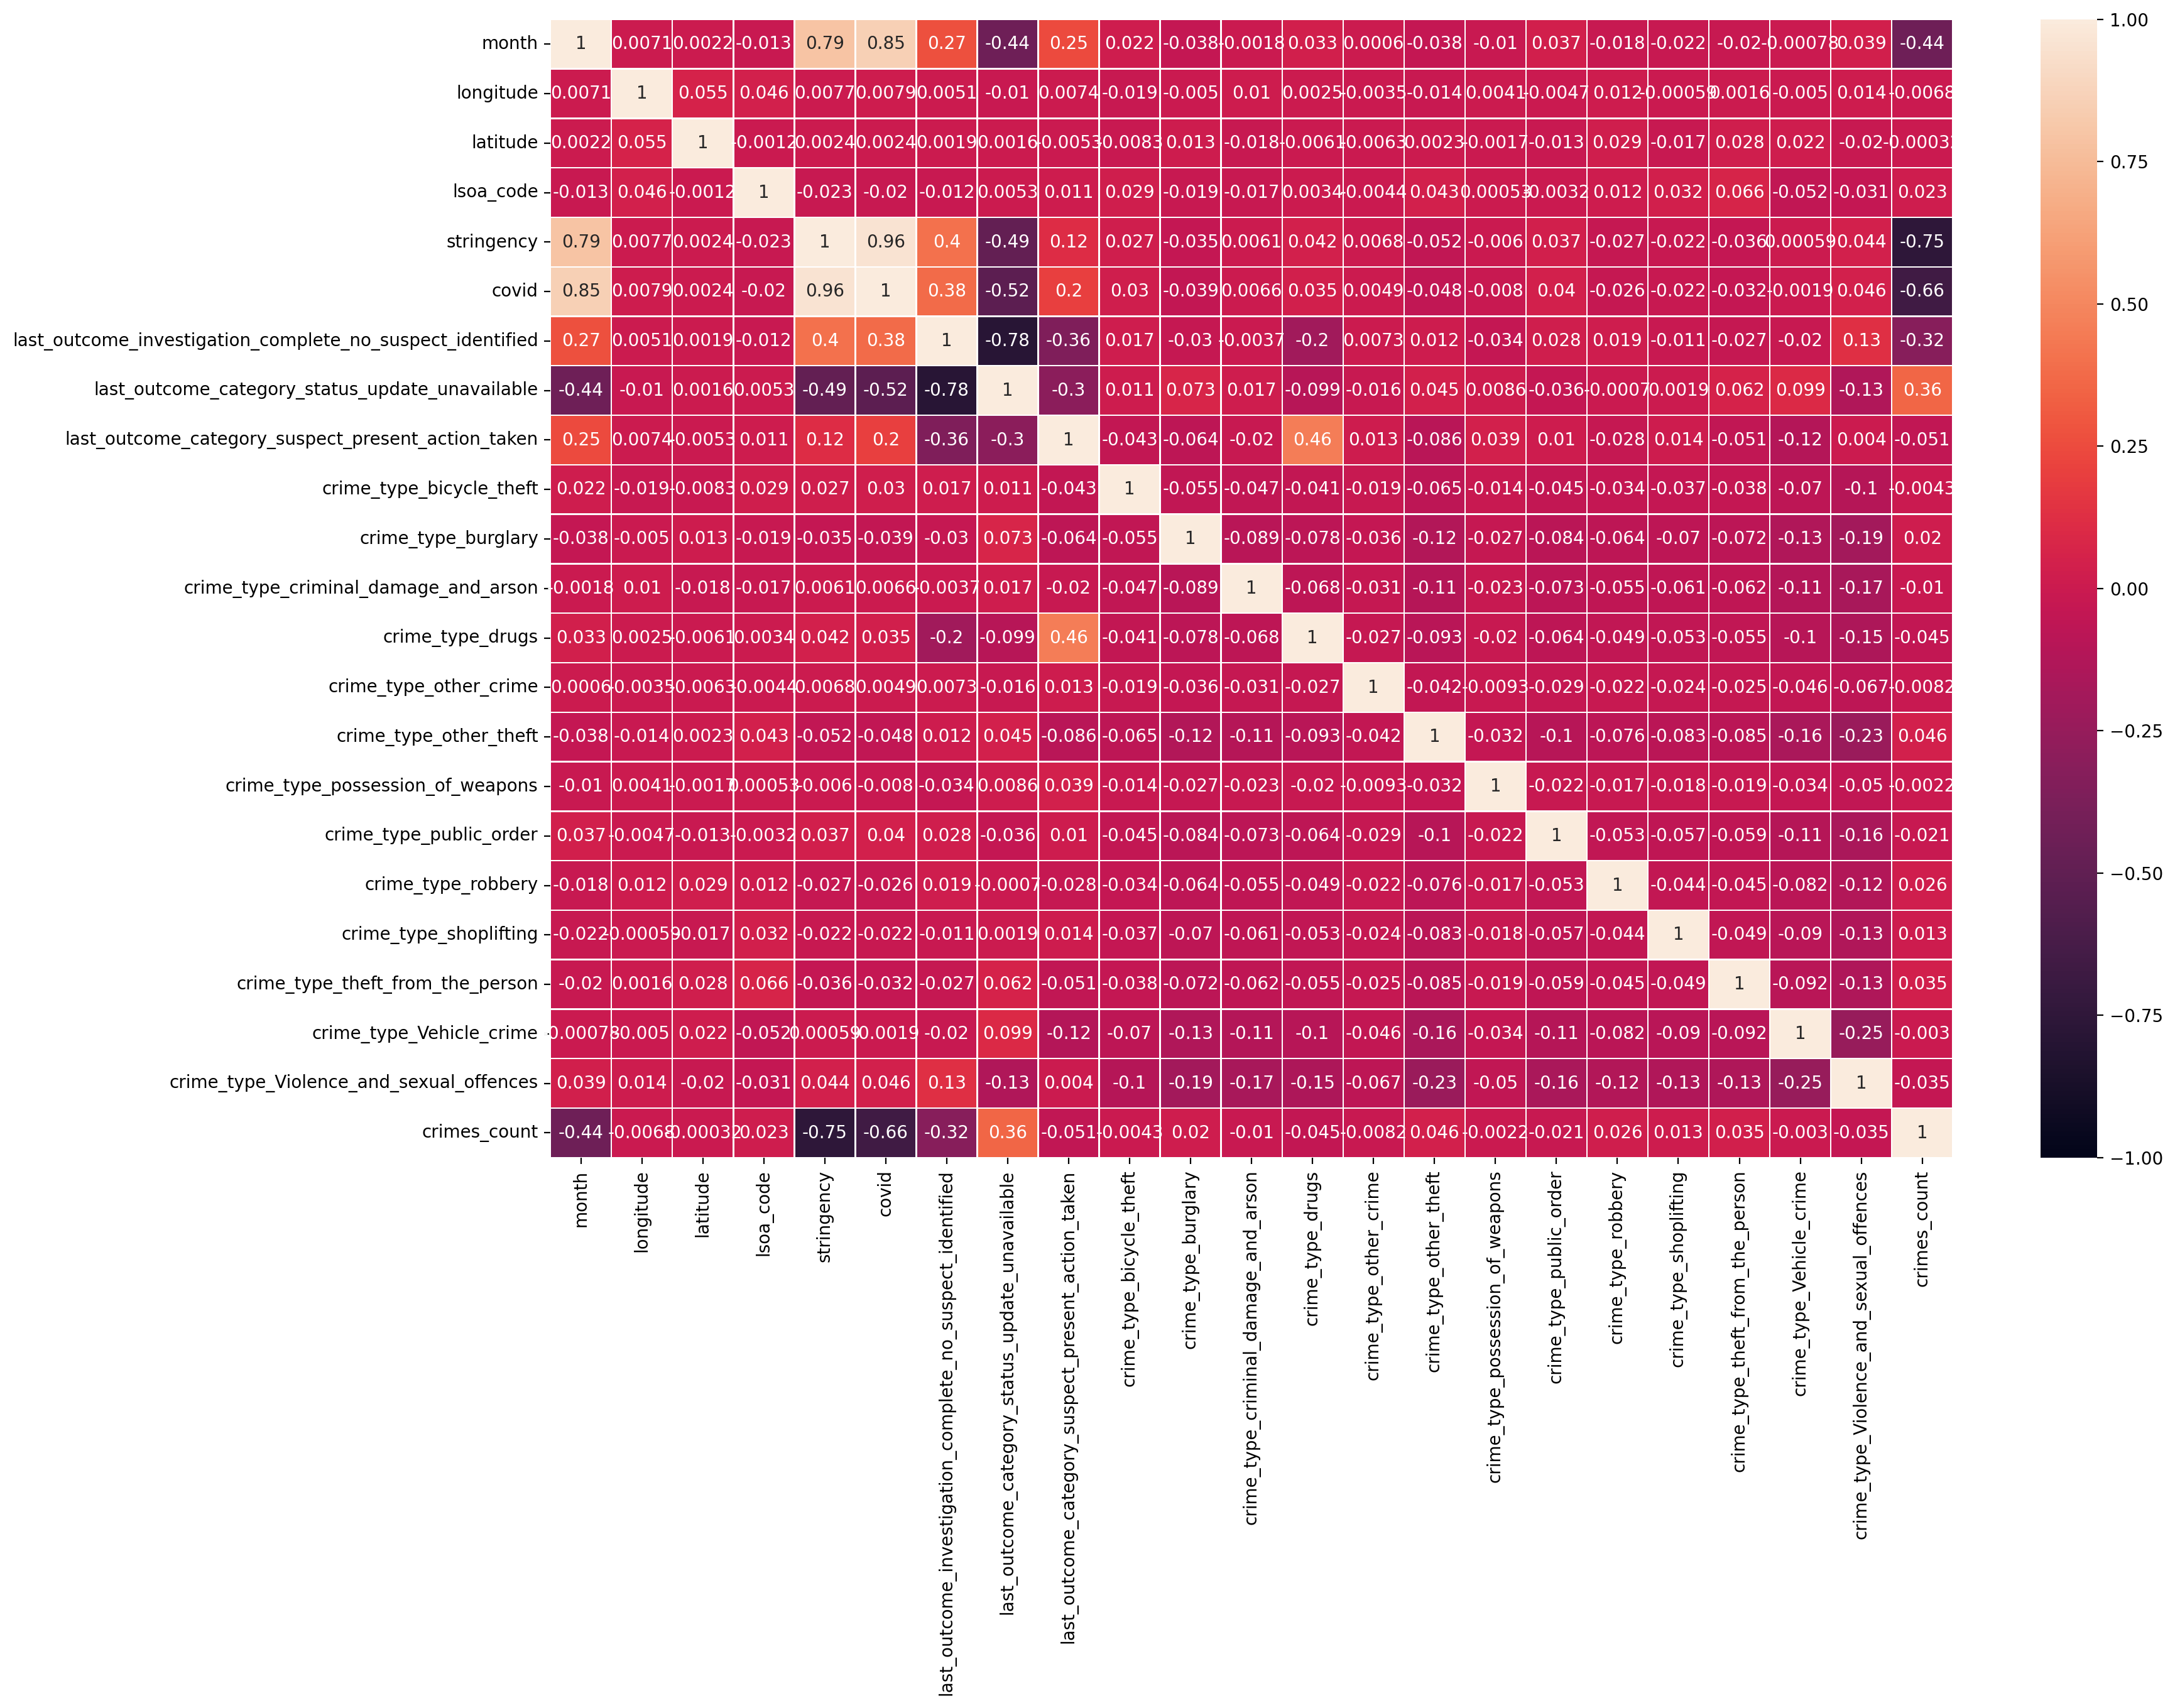

In [ ]:
# first we are doing a correlation matrix to see which values we can drop
corr_matrix(london, linewidth=0.5)

In [ ]:
# as we can see crime types and outcomes show no correlation 

In [ ]:
clustering_lon = london.drop(london.iloc[:, 6:22], axis=1) # 6:22
clustering_lon

month  longitude  ...  covid  crimes_count
0       1604188800000000000  -0.109323  ...      1         59213
1       1551398400000000000  -0.139662  ...      0         73572
2       1622505600000000000  -0.214779  ...      1         63247
3       1517443200000000000  -0.037628  ...      0         58614
4       1543622400000000000  -0.114509  ...      0         66738
...                     ...        ...  ...    ...           ...
199995  1519862400000000000  -0.112715  ...      0         62817
199996  1596240000000000000   0.035658  ...      1         64580
199997  1614556800000000000  -0.368216  ...      1         56772
199998  1554076800000000000  -0.096049  ...      0         67977
199999  1561939200000000000  -0.396294  ...      0         69256

[191030 rows x 7 columns]

In [ ]:
# covid and stringency represent the same information so it is redundant. when we remove one the 
# correlation between clusters and covid state (before or during) increases 
clustering_lon = clustering_lon.drop(columns=['stringency', 'lsoa_code'])

In [ ]:
clustering_lon

month  longitude   latitude  covid  crimes_count
0       1604188800000000000  -0.109323  51.468731      1         59213
1       1551398400000000000  -0.139662  51.512911      0         73572
2       1622505600000000000  -0.214779  51.444612      1         63247
3       1517443200000000000  -0.037628  51.650525      0         58614
4       1543622400000000000  -0.114509  51.361712      0         66738
...                     ...        ...        ...    ...           ...
199995  1519862400000000000  -0.112715  51.603431      0         62817
199996  1596240000000000000   0.035658  51.581338      1         64580
199997  1614556800000000000  -0.368216  51.571013      1         56772
199998  1554076800000000000  -0.096049  51.374219      0         67977
199999  1561939200000000000  -0.396294  51.576427      0         69256

[191030 rows x 5 columns]

In [ ]:
lon_array  = np.array(clustering_lon)
lon_array

array([[ 1.6041888e+18, -1.0932300e-01,  5.1468731e+01,  1.0000000e+00,
         5.9213000e+04],
       [ 1.5513984e+18, -1.3966200e-01,  5.1512911e+01,  0.0000000e+00,
         7.3572000e+04],
       [ 1.6225056e+18, -2.1477900e-01,  5.1444612e+01,  1.0000000e+00,
         6.3247000e+04],
       ...,
       [ 1.6145568e+18, -3.6821600e-01,  5.1571013e+01,  1.0000000e+00,
         5.6772000e+04],
       [ 1.5540768e+18, -9.6049000e-02,  5.1374219e+01,  0.0000000e+00,
         6.7977000e+04],
       [ 1.5619392e+18, -3.9629400e-01,  5.1576427e+01,  0.0000000e+00,
         6.9256000e+04]])

In [ ]:
# using elbow method to determine the ideal number of clusters
distortions = []
k_clusters = range(1,10)
for cluster in k_clusters:
    kmeansmodel = KMeans(n_clusters=cluster)
    kmeansmodel.fit(clustering_lon)
    distortions.append(kmeansmodel.inertia_)

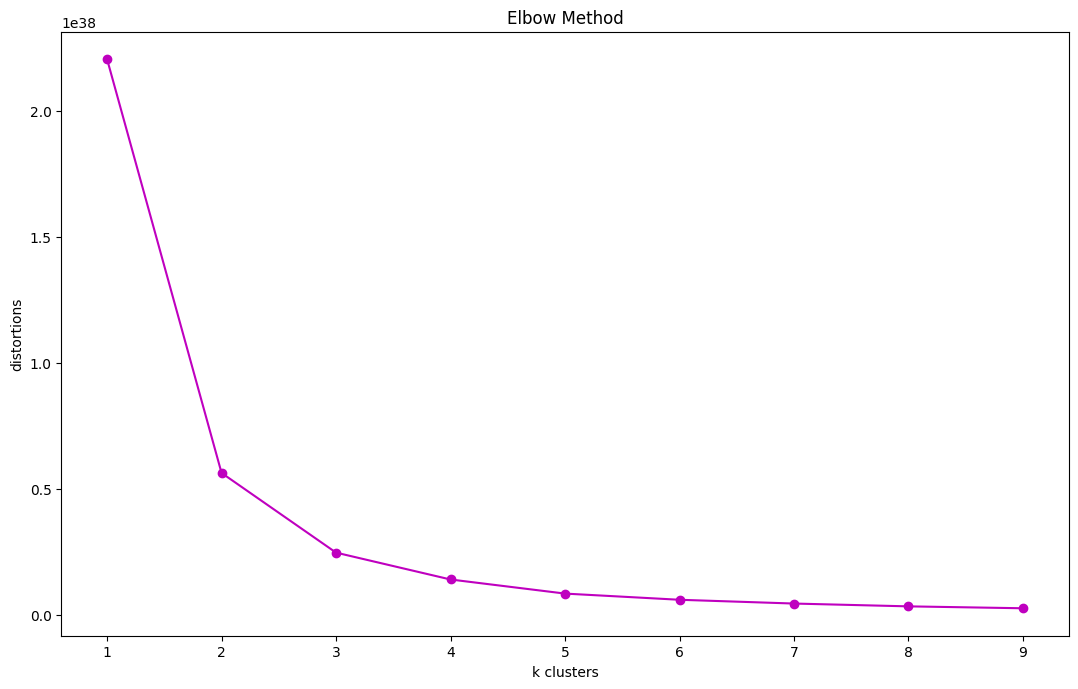

In [ ]:
plt.figure(figsize=(13,8), dpi=100)
plt.plot(k_clusters, distortions, 'mo-')
plt.xlabel('k clusters')
plt.ylabel('distortions')
plt.title('Elbow Method')
plt.show()

In [ ]:
# fitting kmeans
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=1000, algorithm='elkan')
kmeans_.fit(clustering_lon)
kmeans_pred = kmeans_.fit_predict(clustering_lon)

In [ ]:
clustering_lon['kmeans_clusters'] = kmeans_pred
clustering_lon

month  longitude  ...  crimes_count  kmeans_clusters
0       1604188800000000000  -0.109323  ...         59213                0
1       1551398400000000000  -0.139662  ...         73572                1
2       1622505600000000000  -0.214779  ...         63247                0
3       1517443200000000000  -0.037628  ...         58614                2
4       1543622400000000000  -0.114509  ...         66738                2
...                     ...        ...  ...           ...              ...
199995  1519862400000000000  -0.112715  ...         62817                2
199996  1596240000000000000   0.035658  ...         64580                0
199997  1614556800000000000  -0.368216  ...         56772                0
199998  1554076800000000000  -0.096049  ...         67977                1
199999  1561939200000000000  -0.396294  ...         69256                1

[191030 rows x 6 columns]

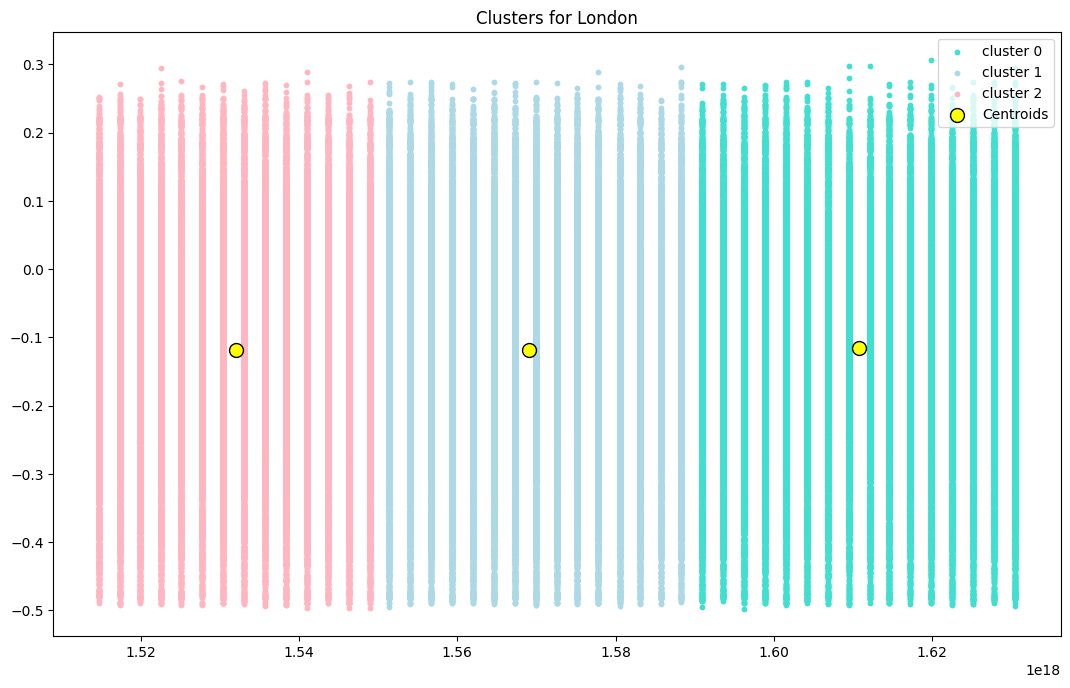

In [ ]:
#plotting 
plt.figure(figsize=(13,8), dpi=100)
plt.title('Clusters for London')
plt.scatter(lon_array[kmeans_pred == 0, 0], lon_array[kmeans_pred == 0, 1], s = 10, c='turquoise', label='cluster 0')
plt.scatter(lon_array[kmeans_pred == 1, 0], lon_array[kmeans_pred == 1, 1], s = 10, c='lightblue', label='cluster 1')
plt.scatter(lon_array[kmeans_pred == 2, 0], lon_array[kmeans_pred == 2, 1], s = 10, c='lightpink', label='cluster 2') 
#plt.scatter(lon_array[kmeans_pred == 3, 0], lon_array[kmeans_pred == 3, 1], s = 10, c='orchid', label='cluster 3') 
# Plotting the centroids 
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s = 100, c='yellow', edgecolor='black', label='Centroids')
plt.legend()

In [ ]:
# next we will split the df based on the clusters and create a correlation matrix for each.
# that way we can see which values had an effect for forming each cluster and whether the covid col
# played a role in each cluster by checking the correlation 
# after, to see which cluster was more associated with before or during covid we can take the mean of the covid col for each df 

In [ ]:
# split data to separate ones based on the 4 clusters
def split_df(df, cluster_n, city):
  '''
  creates separate dfs for each cluster
  '''
  df = pd.DataFrame(df)


  if city == 1:
    df_new = df[df['kmeans_clusters'] == cluster_n]
    df_new = pd.DataFrame(df_new)
    df_new.to_csv('df_oth{}.csv'.format(cluster_n), index=False)
  else:
    df_new = df[df['kmeans_clusters'] == cluster_n]
    df_new = pd.DataFrame(df_new)
    df_new.to_csv('df{}.csv'.format(cluster_n), index=False)

  return df_new

In [ ]:
split_df(clustering_lon, 0, 0)
split_df(clustering_lon, 1, 0)
split_df(clustering_lon, 2, 0)

month  longitude  ...  crimes_count  kmeans_clusters
3       1517443200000000000  -0.037628  ...         58614                2
4       1543622400000000000  -0.114509  ...         66738                2
6       1533081600000000000  -0.077706  ...         64528                2
7       1525132800000000000   0.204436  ...         66002                2
8       1530403200000000000  -0.060120  ...         69301                2
...                     ...        ...  ...           ...              ...
199977  1522540800000000000  -0.175147  ...         62269                2
199984  1541030400000000000  -0.051036  ...         69703                2
199988  1541030400000000000  -0.080330  ...         69703                2
199990  1535760000000000000  -0.335456  ...         64272                2
199995  1519862400000000000  -0.112715  ...         62817                2

[61895 rows x 6 columns]

In [ ]:
df0 = pd.read_csv('df0.csv')
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df2

month  longitude  ...  crimes_count  kmeans_clusters
0      1517443200000000000  -0.037628  ...         58614                2
1      1543622400000000000  -0.114509  ...         66738                2
2      1533081600000000000  -0.077706  ...         64528                2
3      1525132800000000000   0.204436  ...         66002                2
4      1530403200000000000  -0.060120  ...         69301                2
...                    ...        ...  ...           ...              ...
61890  1522540800000000000  -0.175147  ...         62269                2
61891  1541030400000000000  -0.051036  ...         69703                2
61892  1541030400000000000  -0.080330  ...         69703                2
61893  1535760000000000000  -0.335456  ...         64272                2
61894  1519862400000000000  -0.112715  ...         62817                2

[61895 rows x 6 columns]

In [ ]:
# examining the two columns (covid and kmeans)
df0.describe()


month     longitude  ...  crimes_count  kmeans_clusters
count  6.410100e+04  64101.000000  ...  64101.000000          64101.0
mean   1.610757e+18     -0.115779  ...  59796.270557              0.0
std    1.236023e+16      0.144712  ...   5192.673516              0.0
min    1.590970e+18     -0.497698  ...  47535.000000              0.0
25%    1.598918e+18     -0.201391  ...  56526.000000              0.0
50%    1.609459e+18     -0.107804  ...  61347.000000              0.0
75%    1.622506e+18     -0.025947  ...  63982.000000              0.0
max    1.630454e+18      0.307151  ...  64580.000000              0.0

[8 rows x 6 columns]

In [ ]:
df1.describe()

month     longitude  ...  crimes_count  kmeans_clusters
count  6.503400e+04  65034.000000  ...  65034.000000          65034.0
mean   1.569060e+18     -0.119122  ...  65972.074392              1.0
std    1.115808e+16      0.142969  ...   6883.386939              0.0
min    1.551398e+18     -0.494977  ...  44265.000000              1.0
25%    1.559347e+18     -0.200142  ...  63895.000000              1.0
50%    1.569888e+18     -0.114301  ...  68776.000000              1.0
75%    1.577837e+18     -0.033996  ...  69864.000000              1.0
max    1.588291e+18      0.296870  ...  73572.000000              1.0

[8 rows x 6 columns]

In [ ]:
df2.describe()

month     longitude  ...  crimes_count  kmeans_clusters
count  6.189500e+04  61895.000000  ...  61895.000000          61895.0
mean   1.532002e+18     -0.118206  ...  65632.125584              2.0
std    1.058575e+16      0.141755  ...   2930.540458              0.0
min    1.514765e+18     -0.496766  ...  58614.000000              2.0
25%    1.522541e+18     -0.198208  ...  64272.000000              2.0
50%    1.533082e+18     -0.113877  ...  65877.000000              2.0
75%    1.541030e+18     -0.033291  ...  67773.000000              2.0
max    1.548979e+18      0.294549  ...  69703.000000              2.0

[8 rows x 6 columns]

In [ ]:
# as we can see from the means cluster 0 is more assocaited with after covid whereas
# cluster 1 and 2 are associated with before covid. That indicates that there is a difference
# in crime before and after covid. that is also shown in the correlation heatmaps bellow


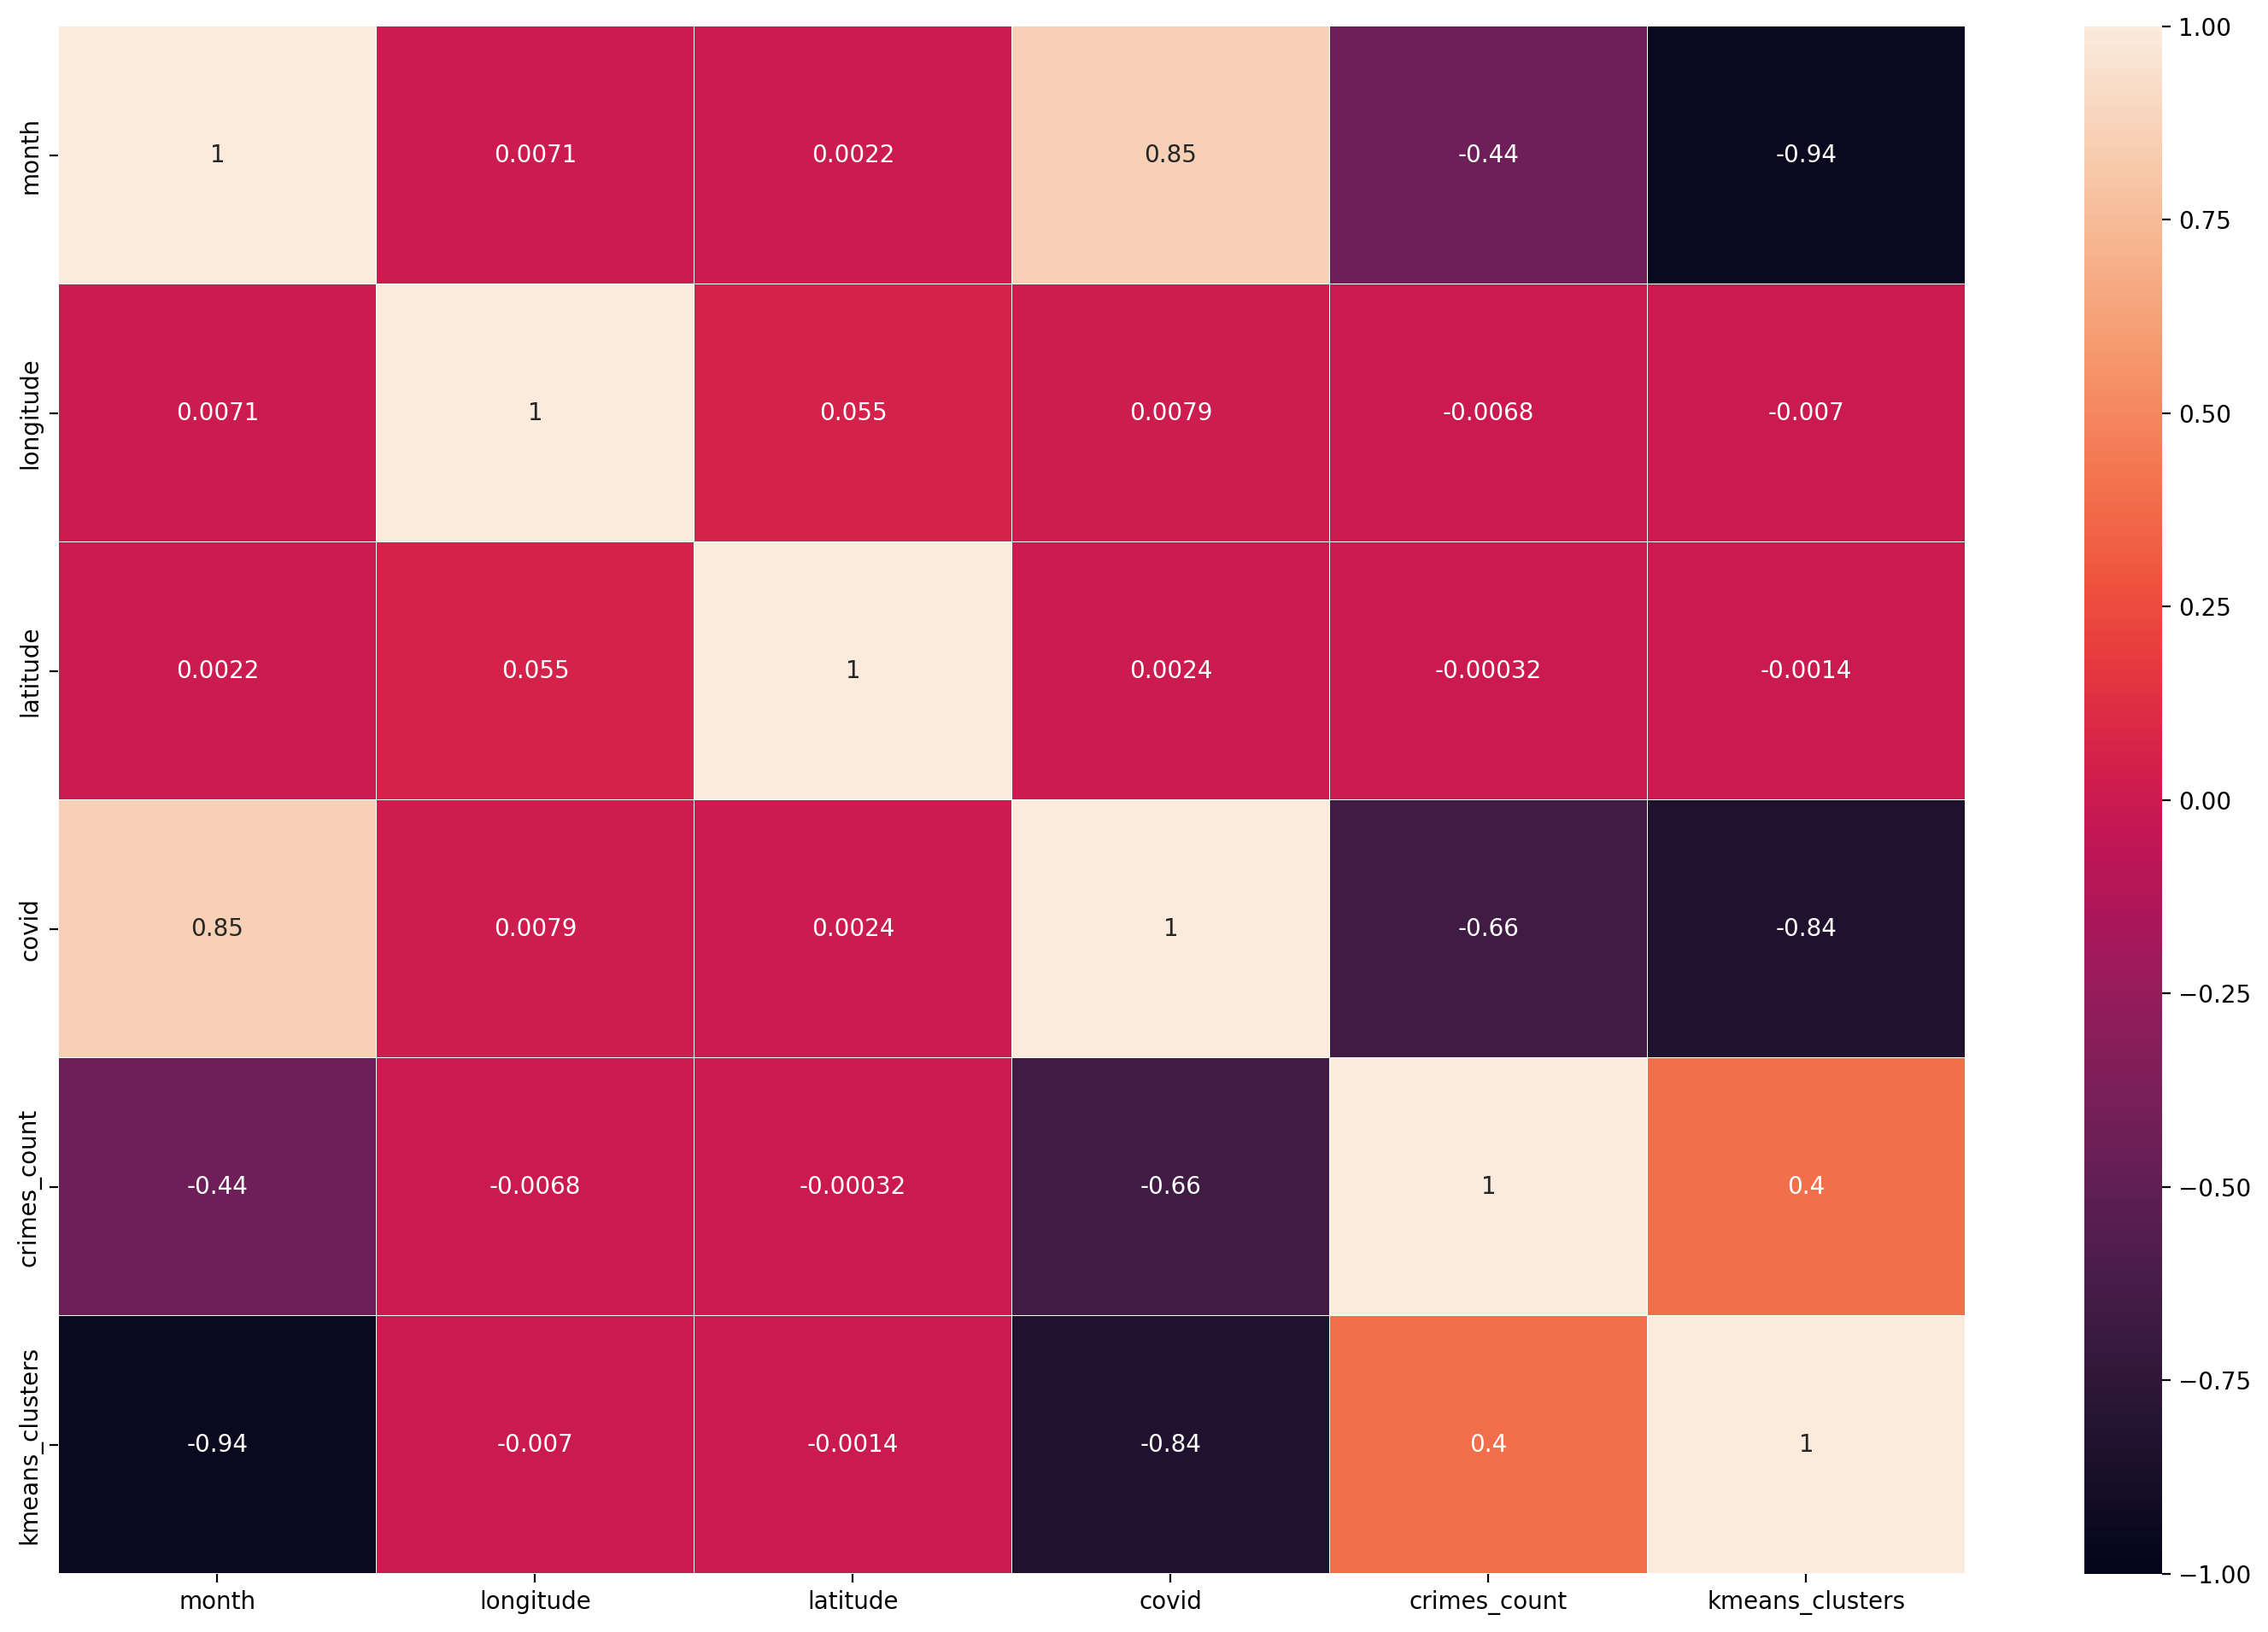

In [ ]:
corr_matrix(clustering_lon, linewidth=0.2)

# Other cities

In [ ]:
# repeating the same for the other cities
other

month  ...  crimes_count
0       1596240000000000000  ...       64580.0
1       1575158400000000000  ...       65919.0
2       1535760000000000000  ...       64272.0
3       1577836800000000000  ...       69864.0
4       1575158400000000000  ...       65919.0
...                     ...  ...           ...
199994  1546300800000000000  ...       67773.0
199995  1527811200000000000  ...       65393.0
199996  1627776000000000000  ...       60967.0
199998  1593561600000000000  ...       63679.0
199999  1561939200000000000  ...       69256.0

[190788 rows x 23 columns]

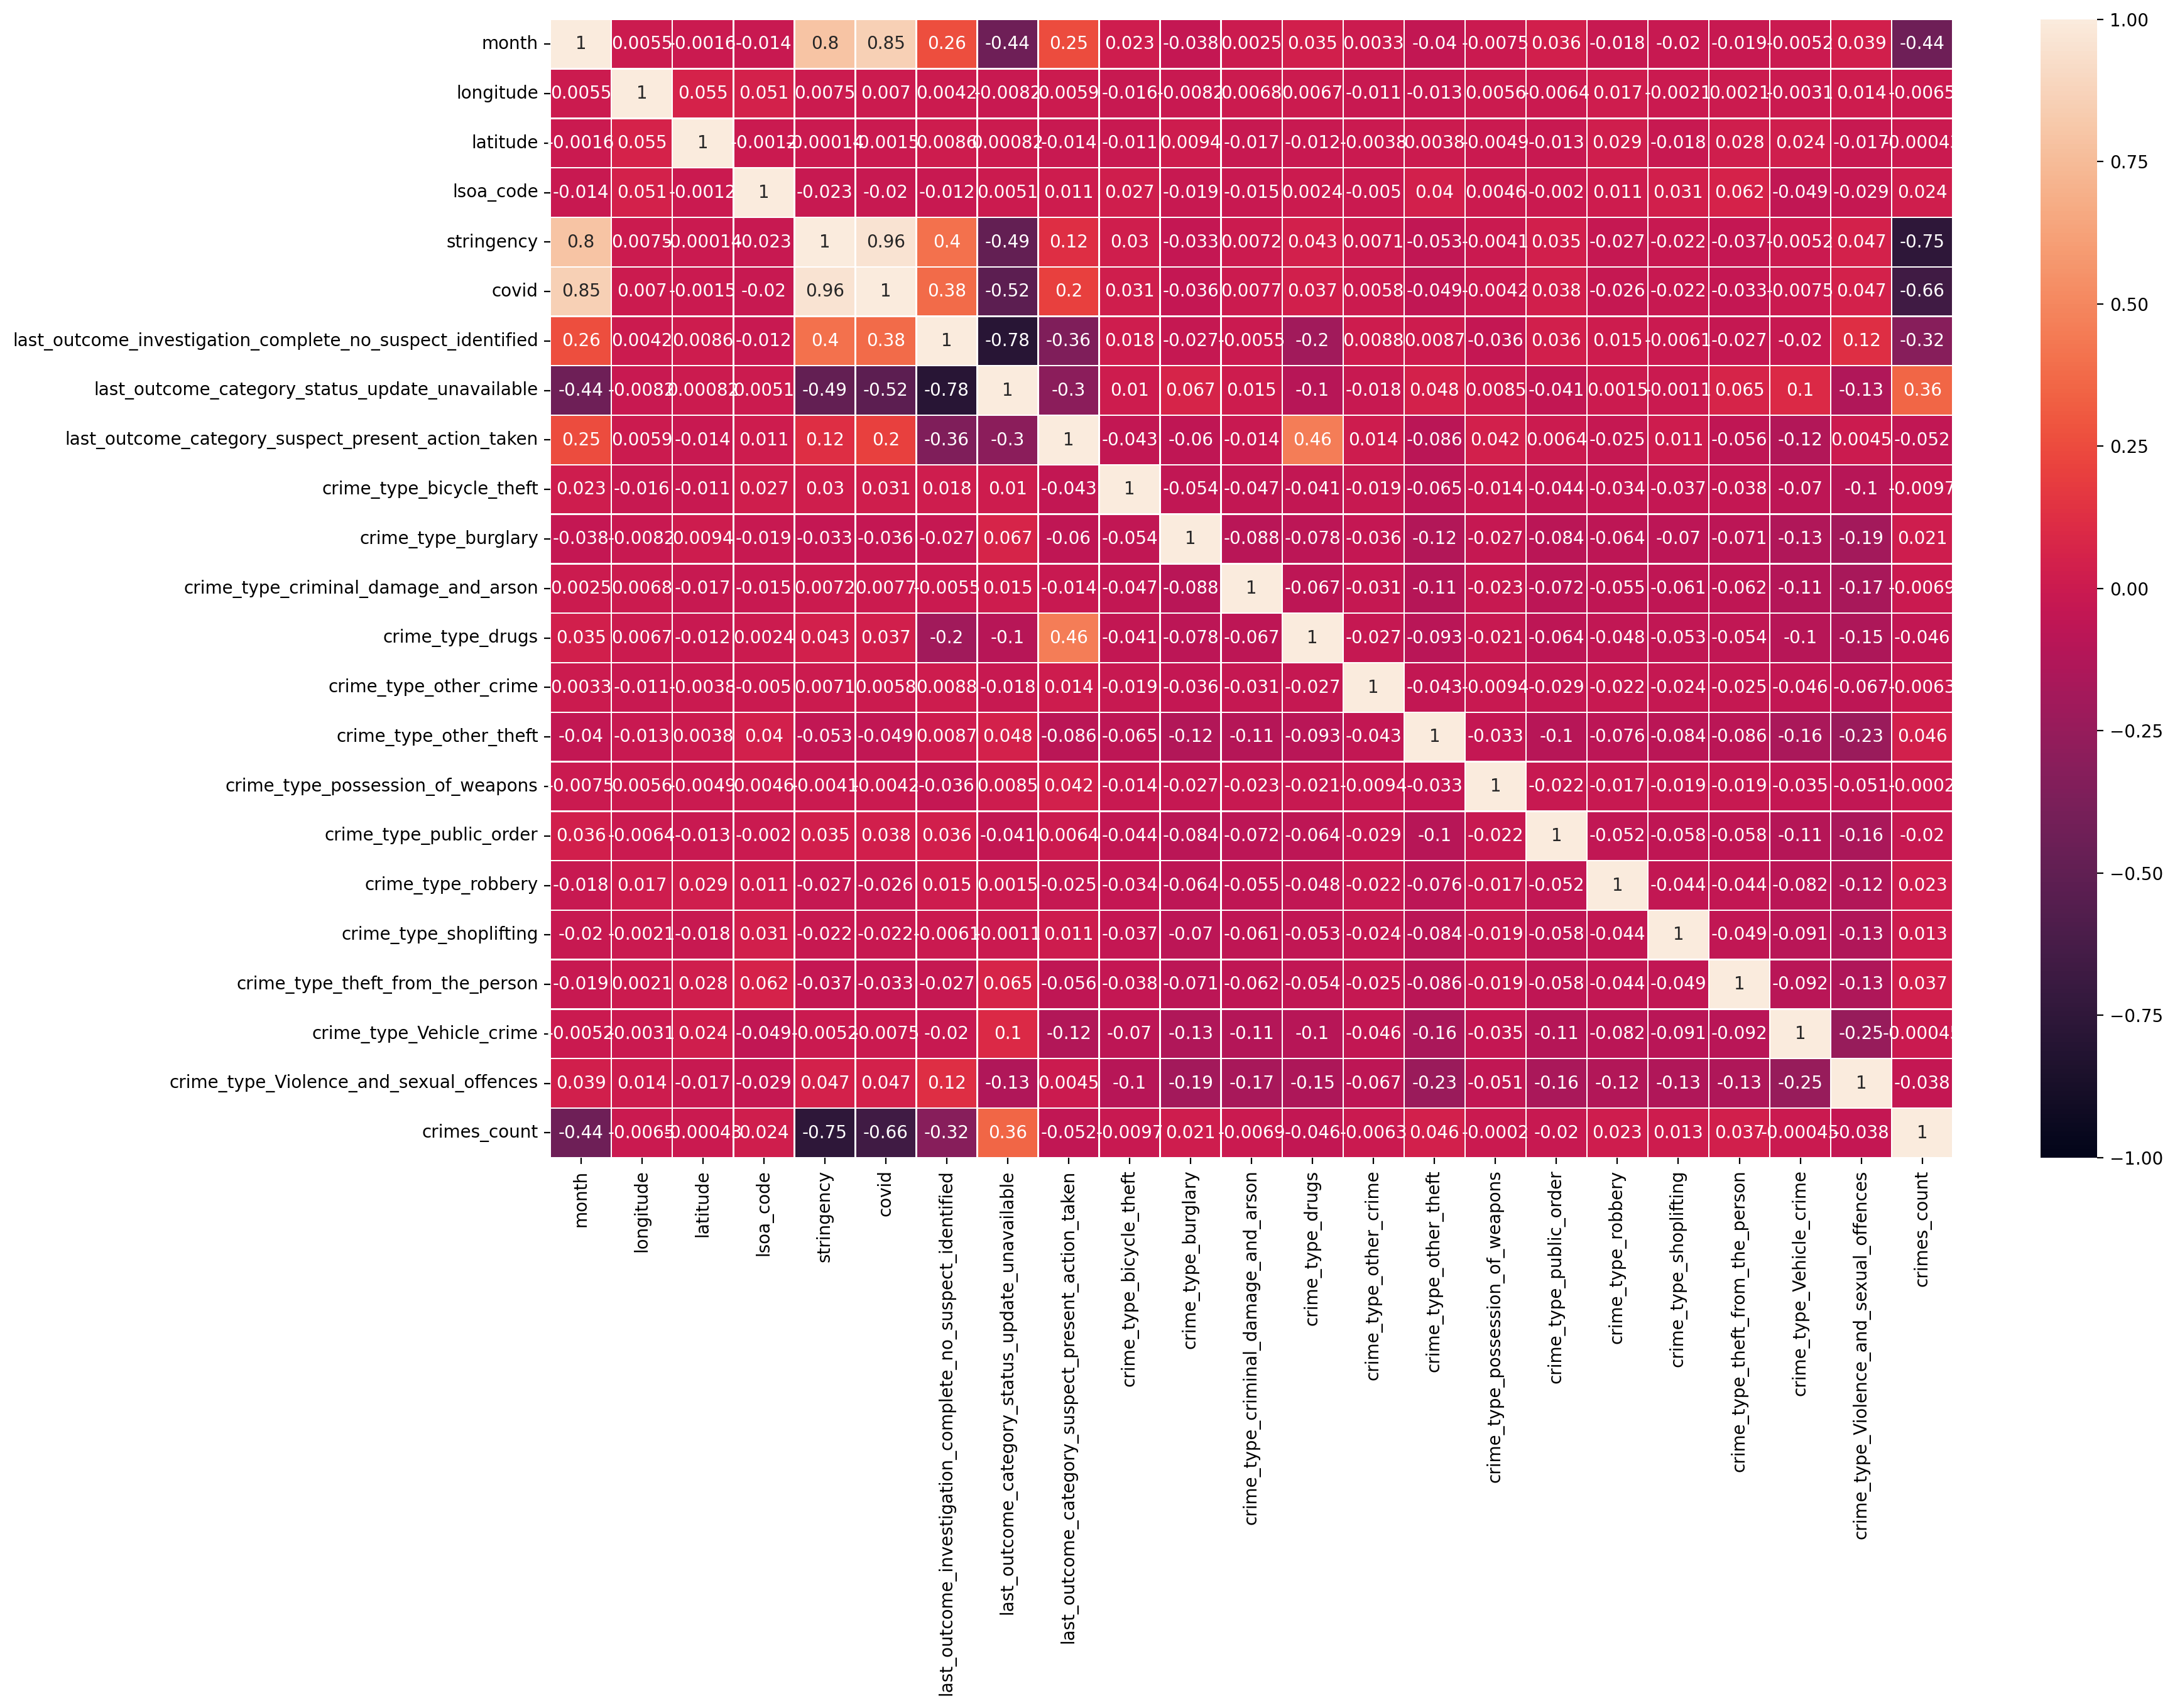

In [ ]:
corr_matrix(other, linewidth=0.5)

In [ ]:
clustering_oth = other.drop(other.iloc[:, 6:22], axis=1)


In [ ]:
clustering_oth = clustering_oth.drop(columns=['lsoa_code', 'stringency'])
clustering_oth

month  longitude   latitude  covid  crimes_count
0       1596240000000000000  -0.309091  51.490999      1       64580.0
1       1575158400000000000   0.069631  51.552642      0       65919.0
2       1535760000000000000  -0.291239  51.553120      0       64272.0
3       1577836800000000000  -0.210964  51.454221      0       69864.0
4       1575158400000000000  -0.147038  51.470350      0       65919.0
...                     ...        ...        ...    ...           ...
199994  1546300800000000000  -0.150662  51.514605      0       67773.0
199995  1527811200000000000  -0.127242  51.544817      0       65393.0
199996  1627776000000000000  -0.241744  51.455541      1       60967.0
199998  1593561600000000000  -0.219236  51.504246      1       63679.0
199999  1561939200000000000  -0.034764  51.469196      0       69256.0

[190788 rows x 5 columns]

In [ ]:
oth_array  = np.array(clustering_oth)
oth_array

array([[ 1.5962400e+18, -3.0909100e-01,  5.1490999e+01,  1.0000000e+00,
         6.4580000e+04],
       [ 1.5751584e+18,  6.9631000e-02,  5.1552642e+01,  0.0000000e+00,
         6.5919000e+04],
       [ 1.5357600e+18, -2.9123900e-01,  5.1553120e+01,  0.0000000e+00,
         6.4272000e+04],
       ...,
       [ 1.6277760e+18, -2.4174400e-01,  5.1455541e+01,  1.0000000e+00,
         6.0967000e+04],
       [ 1.5935616e+18, -2.1923600e-01,  5.1504246e+01,  1.0000000e+00,
         6.3679000e+04],
       [ 1.5619392e+18, -3.4764000e-02,  5.1469196e+01,  0.0000000e+00,
         6.9256000e+04]])

In [ ]:
distortions2 = []
k_clusters = range(1,10)
for cluster in k_clusters:
    kmeansmodel = KMeans(n_clusters=cluster)
    kmeansmodel.fit(clustering_oth)
    distortions2.append(kmeansmodel.inertia_)

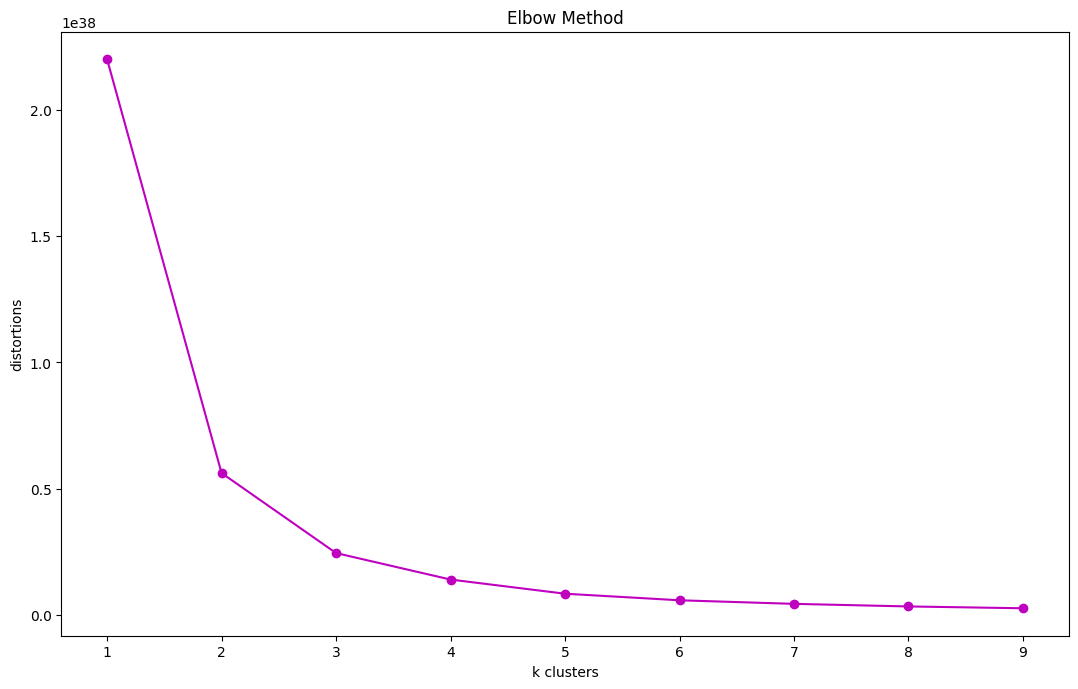

In [ ]:
plt.figure(figsize=(13,8), dpi=100)
plt.plot(k_clusters, distortions2, 'mo-')
plt.xlabel('k clusters')
plt.ylabel('distortions')
plt.title('Elbow Method')
plt.show()

In [ ]:
# fitting kmeans
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=1000, algorithm='elkan')
kmeans_.fit(clustering_oth)
kmeans_pred2 = kmeans_.fit_predict(clustering_oth)

In [ ]:
clustering_oth['kmeans_clusters'] = kmeans_pred2
clustering_oth

month  longitude  ...  crimes_count  kmeans_clusters
0       1596240000000000000  -0.309091  ...       64580.0                0
1       1575158400000000000   0.069631  ...       65919.0                2
2       1535760000000000000  -0.291239  ...       64272.0                1
3       1577836800000000000  -0.210964  ...       69864.0                2
4       1575158400000000000  -0.147038  ...       65919.0                2
...                     ...        ...  ...           ...              ...
199994  1546300800000000000  -0.150662  ...       67773.0                1
199995  1527811200000000000  -0.127242  ...       65393.0                1
199996  1627776000000000000  -0.241744  ...       60967.0                0
199998  1593561600000000000  -0.219236  ...       63679.0                0
199999  1561939200000000000  -0.034764  ...       69256.0                2

[190788 rows x 6 columns]

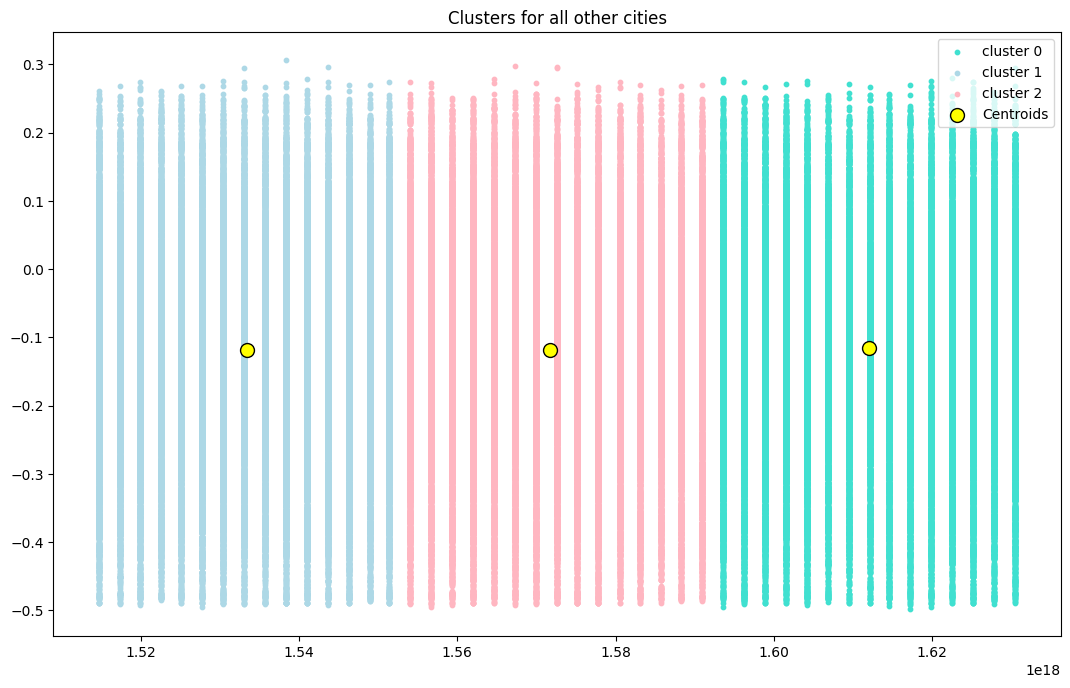

In [ ]:
#plotting 
plt.figure(figsize=(13,8), dpi=100)
plt.title('Clusters for all other cities')
plt.scatter(oth_array[kmeans_pred2 == 0, 0], oth_array[kmeans_pred2 == 0, 1], s=10, c='turquoise', label='cluster 0')
plt.scatter(oth_array[kmeans_pred2 == 1, 0], oth_array[kmeans_pred2 == 1, 1], s=10, c='lightblue', label='cluster 1')
plt.scatter(oth_array[kmeans_pred2 == 2, 0], oth_array[kmeans_pred2 == 2, 1], s=10, c='lightpink', label='cluster 2') 
#plt.scatter(oth_array[kmeans_pred2 == 3, 0], oth_array[kmeans_pred2 == 3, 1], s=10, c='orchid', label='cluster 3') 
# Plotting the centroids 
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s=100, c='yellow', edgecolor='black', label='Centroids')
plt.legend()

In [ ]:
split_df(clustering_oth, 0, 1)
split_df(clustering_oth, 1, 1)
split_df(clustering_oth, 2, 1)

month  longitude  ...  crimes_count  kmeans_clusters
1       1575158400000000000   0.069631  ...       65919.0                2
3       1577836800000000000  -0.210964  ...       69864.0                2
4       1575158400000000000  -0.147038  ...       65919.0                2
5       1561939200000000000  -0.023483  ...       69256.0                2
8       1569888000000000000  -0.231793  ...       71543.0                2
...                     ...        ...  ...           ...              ...
199980  1554076800000000000  -0.028530  ...       67977.0                2
199981  1577836800000000000  -0.397514  ...       69864.0                2
199985  1572566400000000000  -0.019465  ...       68776.0                2
199992  1564617600000000000  -0.223511  ...       63895.0                2
199999  1561939200000000000  -0.034764  ...       69256.0                2

[63894 rows x 6 columns]

In [ ]:
df_oth0 = pd.read_csv('df_oth0.csv')
df_oth1 = pd.read_csv('df_oth1.csv')
df_oth2 = pd.read_csv('df_oth2.csv')

In [ ]:
df_oth0.describe()

month     longitude  ...  crimes_count  kmeans_clusters
count  6.029900e+04  60299.000000  ...  60299.000000          60299.0
mean   1.612013e+18     -0.115894  ...  60052.778222              0.0
std    1.165713e+16      0.144263  ...   5235.108766              0.0
min    1.593562e+18     -0.497698  ...  47535.000000              0.0
25%    1.601510e+18     -0.201008  ...  56772.000000              0.0
50%    1.612138e+18     -0.107570  ...  63247.000000              0.0
75%    1.622506e+18     -0.026705  ...  63982.000000              0.0
max    1.630454e+18      0.294549  ...  64580.000000              0.0

[8 rows x 6 columns]

In [ ]:
df_oth1.describe()

month     longitude  ...  crimes_count  kmeans_clusters
count  6.659500e+04  66595.000000  ...  66595.000000          66595.0
mean   1.533455e+18     -0.118327  ...  66225.904407              1.0
std    1.129466e+16      0.141599  ...   3456.019169              0.0
min    1.514765e+18     -0.495314  ...  58614.000000              1.0
25%    1.522541e+18     -0.198312  ...  64272.000000              1.0
50%    1.533082e+18     -0.114049  ...  65877.000000              1.0
75%    1.543622e+18     -0.033064  ...  69301.000000              1.0
max    1.551398e+18      0.307151  ...  73572.000000              1.0

[8 rows x 6 columns]

In [ ]:
df_oth2.describe()

month     longitude  ...  crimes_count  kmeans_clusters
count  6.389400e+04  63894.000000  ...  63894.000000          63894.0
mean   1.571693e+18     -0.118167  ...  64877.967415              2.0
std    1.112649e+16      0.143315  ...   6858.487390              0.0
min    1.554077e+18     -0.494977  ...  44265.000000              2.0
25%    1.561939e+18     -0.199085  ...  63326.000000              2.0
50%    1.572566e+18     -0.112107  ...  67977.000000              2.0
75%    1.580515e+18     -0.031350  ...  69736.000000              2.0
max    1.590970e+18      0.298438  ...  71543.000000              2.0

[8 rows x 6 columns]

In [ ]:
# we observe the same for the other cities too when we observe the means of the covid column 
# once cluster was formed during covid data and two before covid

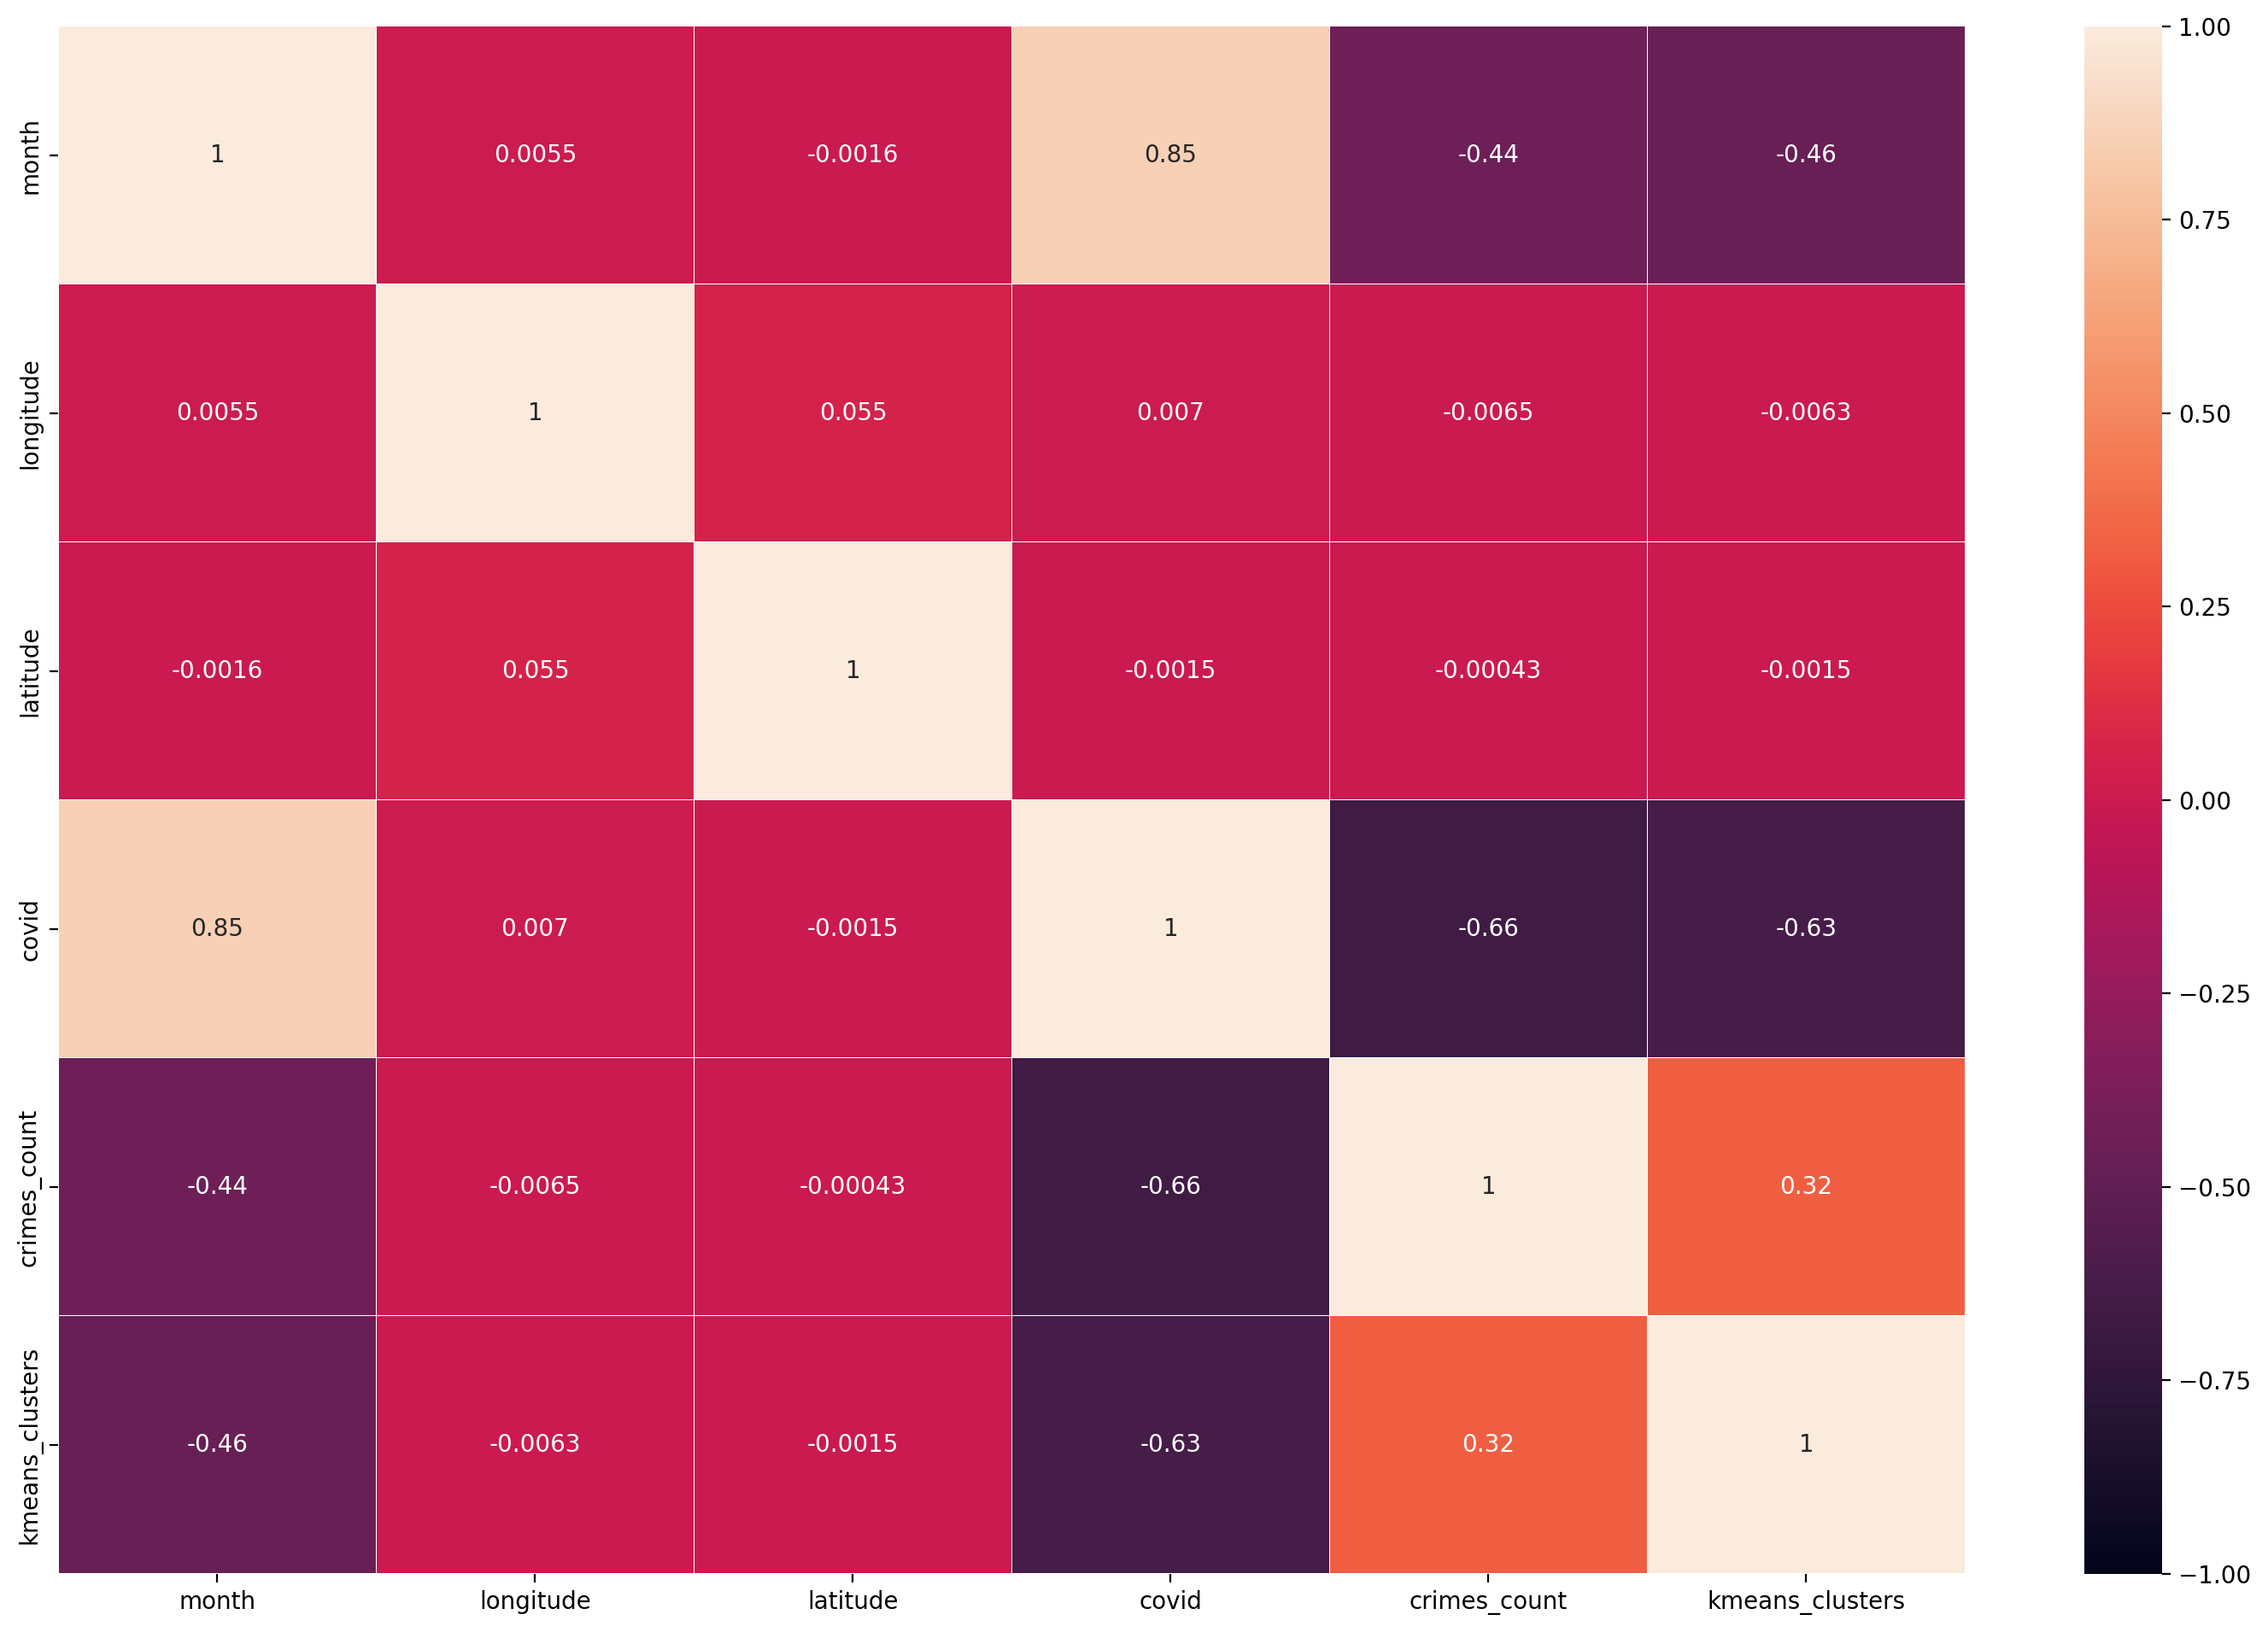

In [ ]:
corr_matrix(clustering_oth, linewidth=0.2)

In [ ]:
# from the overall clustering analysis it seems that there is a difference between before and 
# during covid. the ml classifiers and regressors are not the most reliable in the case of our data
# since for almost all our columns, values are repeating as infomation is gathered per month and not per day
# but clustering is more appropriate since we have unclustered data with no labels and gives better results

In [ ]:
# normally clustering is only one of the primary steps in analysis but due to time constraits we did not have time to do more
# next step would be to find differences between the clusters and find unique characteristics/patterns 

In [ ]:
# what we see from the clustering though is that the clusters have strongly to do with covid and is a strong
# feature that affects the formation of the clusters. We can also observe that for thw clusters after covid the 
# crime count is lower which is in line with the rest of our analyses as crime decreased during covid

# Part 4: Regression on only the groupby rows

In [ ]:
# as a way to deal with the repeating values we also did regression on just the unique values (which was 45 rows in total) by 
# using the groupby function 

#Analysis of crime counts by month for London 
###We will now analyze relationship between crimes in London and Covid-19 measures using crime counts per month as independent varaibles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/london_df.csv')
data

Unnamed: 0    month  ... stringency  covid
0                 0  2018-01  ...      0.000      0
1                 1  2018-01  ...      0.000      0
2                 2  2018-01  ...      0.000      0
3                 3  2018-01  ...      0.000      0
4                 4  2018-01  ...      0.000      0
...             ...      ...  ...        ...    ...
2844236     2844236  2021-09  ...     42.034      1
2844237     2844237  2021-09  ...     42.034      1
2844238     2844238  2021-09  ...     42.034      1
2844239     2844239  2021-09  ...     42.034      1
2844240     2844240  2021-09  ...     42.034      1

[2844241 rows x 13 columns]

In [ ]:
data['crime type'].unique()

array(['Burglary', 'Criminal damage and arson', 'Other theft',
       'Vehicle crime', 'Violence and sexual offences', 'Other crime',
       'Drugs', 'Robbery', 'Shoplifting', 'Public order', 'Bicycle theft',
       'Theft from the person', 'Possession of weapons'], dtype=object)

In [ ]:
#one hot encoding crime type columns
crime_stringency = data[['month', 'crime type', 'stringency', 'covid']].copy()

In [ ]:
data_encoded = pd.get_dummies(crime_stringency, columns = ['crime type'])
data_encoded

month  ...  crime type_Violence and sexual offences
0        2018-01  ...                                        0
1        2018-01  ...                                        0
2        2018-01  ...                                        0
3        2018-01  ...                                        0
4        2018-01  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2844241 rows x 16 columns]

In [ ]:
columns_encoded = data_encoded.columns.to_list()[3:]
columns_encoded

['crime type_Bicycle theft',
 'crime type_Burglary',
 'crime type_Criminal damage and arson',
 'crime type_Drugs',
 'crime type_Other crime',
 'crime type_Other theft',
 'crime type_Possession of weapons',
 'crime type_Public order',
 'crime type_Robbery',
 'crime type_Shoplifting',
 'crime type_Theft from the person',
 'crime type_Vehicle crime',
 'crime type_Violence and sexual offences']

In [ ]:
for value in columns_encoded:
    print(data_encoded[value].value_counts())

0    2766362
1      77879
Name: crime type_Bicycle theft, dtype: int64
0    2587295
1     256946
Name: crime type_Burglary, dtype: int64
0    2649840
1     194401
Name: crime type_Criminal damage and arson, dtype: int64
0    2687933
1     156308
Name: crime type_Drugs, dtype: int64
0    2810195
1      34046
Name: crime type_Other crime, dtype: int64
0    2464934
1     379307
Name: crime type_Other theft, dtype: int64
0    2824963
1      19278
Name: crime type_Possession of weapons, dtype: int64
0    2668225
1     176016
Name: crime type_Public order, dtype: int64
0    2739613
1     104628
Name: crime type_Robbery, dtype: int64
0    2700904
1     143337
Name: crime type_Shoplifting, dtype: int64
0    2695171
1     149070
Name: crime type_Theft from the person, dtype: int64
0    2439840
1     404401
Name: crime type_Vehicle crime, dtype: int64
0    2095617
1     748624
Name: crime type_Violence and sexual offences, dtype: int64


In [ ]:
#removing spaces from column names as sometimes some methods don't accept them
new_columns = []

for column in columns_encoded:
  col = "_".join(column.split())
  new_columns.append(col)
new_columns

['crime_type_Bicycle_theft',
 'crime_type_Burglary',
 'crime_type_Criminal_damage_and_arson',
 'crime_type_Drugs',
 'crime_type_Other_crime',
 'crime_type_Other_theft',
 'crime_type_Possession_of_weapons',
 'crime_type_Public_order',
 'crime_type_Robbery',
 'crime_type_Shoplifting',
 'crime_type_Theft_from_the_person',
 'crime_type_Vehicle_crime',
 'crime_type_Violence_and_sexual_offences']

In [ ]:
old_cols = columns_encoded
rename_cols = zip(old_cols, new_columns)
col_dict = dict(list(rename_cols))

In [ ]:
data_encoded.rename(columns = col_dict, inplace=True )
data_encoded

month  ...  crime_type_Violence_and_sexual_offences
0        2018-01  ...                                        0
1        2018-01  ...                                        0
2        2018-01  ...                                        0
3        2018-01  ...                                        0
4        2018-01  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2844241 rows x 16 columns]

#comparing the number of crimes by type before and during pandemic

In [ ]:
#Getting equal number of dates before and during pandemic
data_encoded['month'].unique().tolist().index('2018-08')

7

In [ ]:
dates_balanced = data_encoded['month'].unique().tolist()[7:]

In [ ]:
def in_dates(item):
    if item in dates_balanced:
        return True
    else: return False

In [ ]:
df_balanced = data_encoded[data['month'].apply(in_dates)]
df_balanced

month  ...  crime type_Violence and sexual offences
9781     2018-08  ...                                        0
9782     2018-08  ...                                        0
9783     2018-08  ...                                        0
9784     2018-08  ...                                        0
9785     2018-08  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2395166 rows x 16 columns]

In [ ]:
df_balanced['month'].unique()

array(['2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01',
       '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
       '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01',
       '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09'], dtype=object)

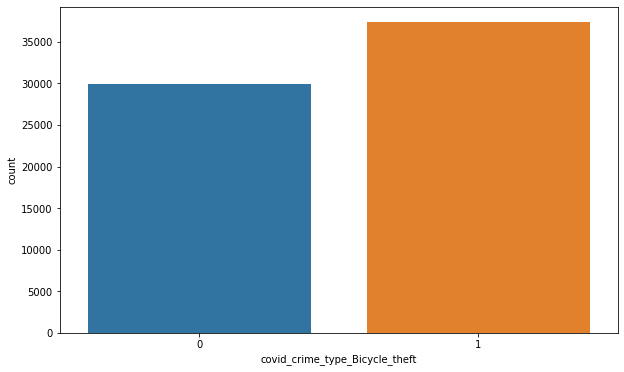

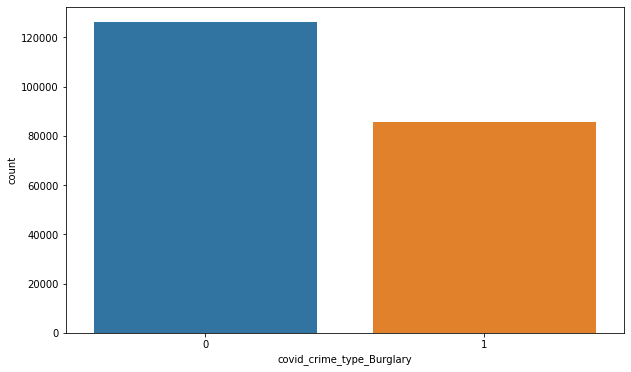

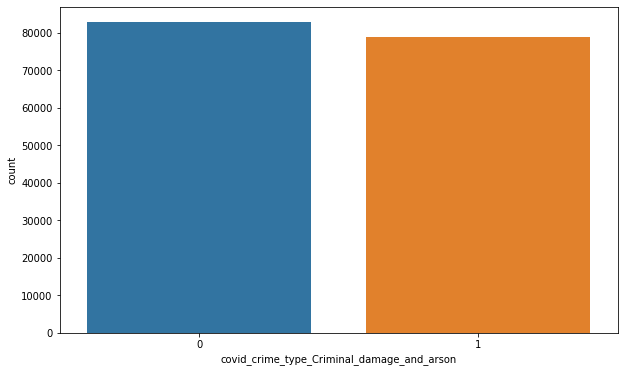

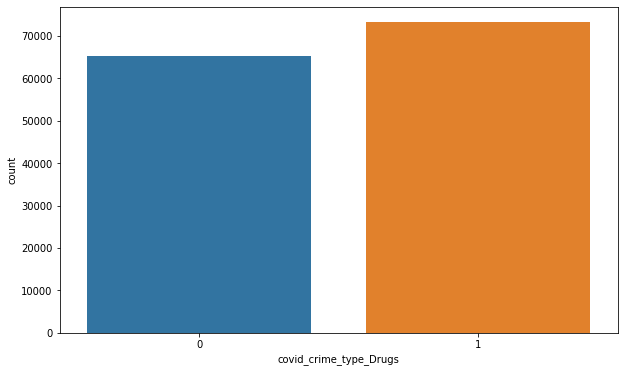

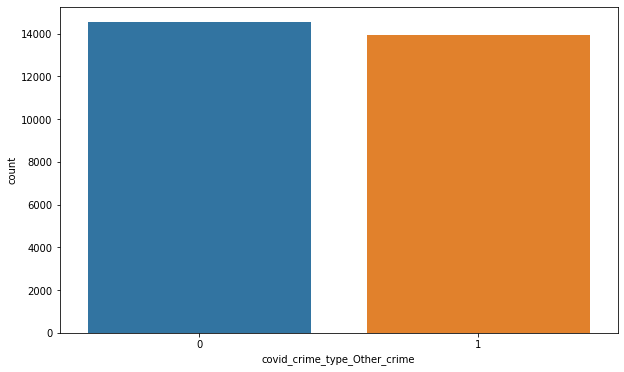

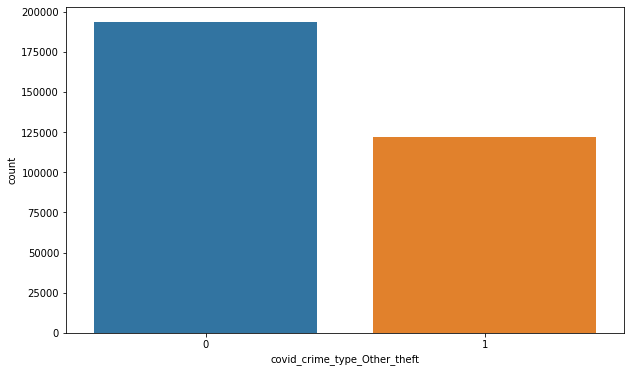

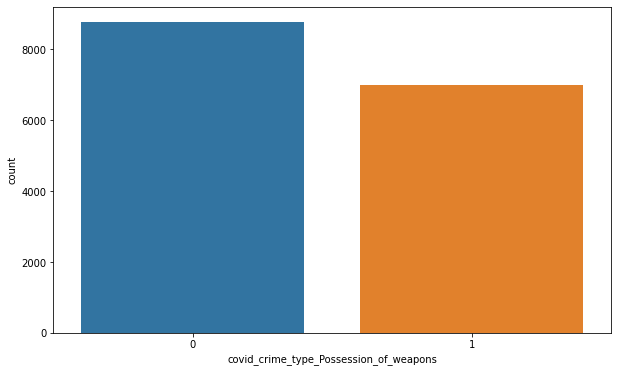

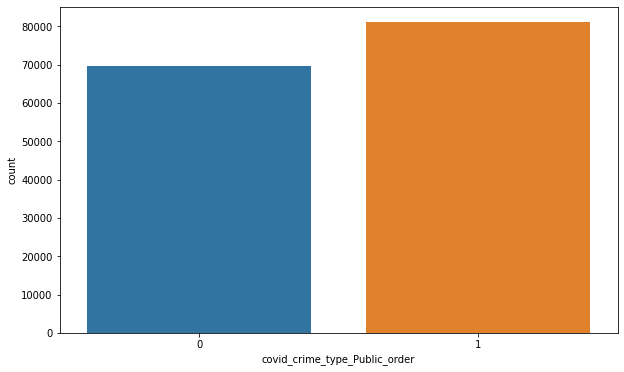

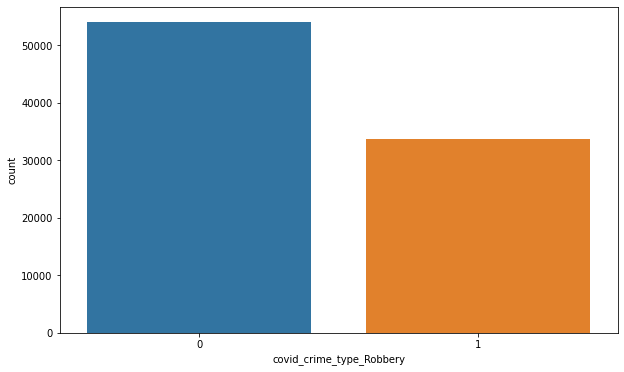

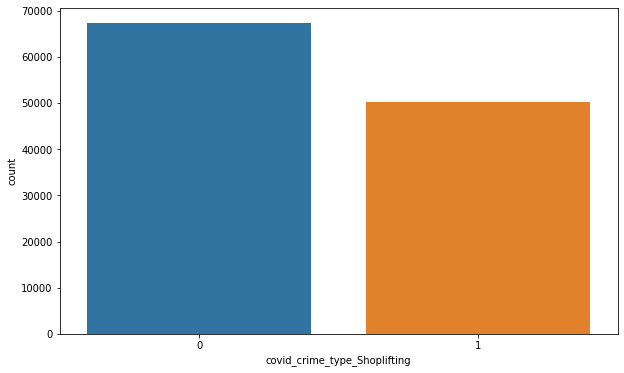

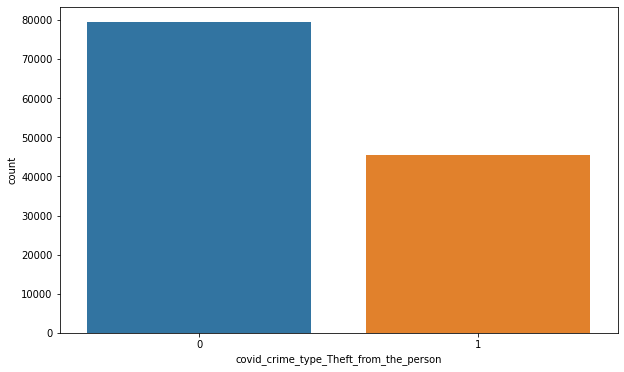

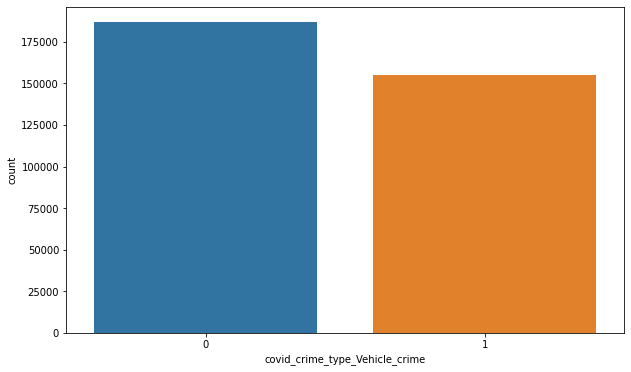

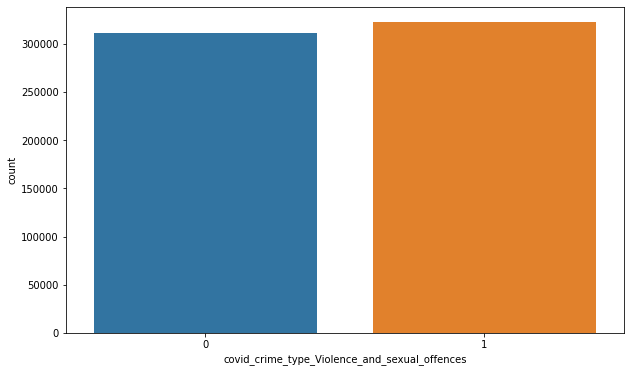

In [ ]:
#comparing the number of crimes by type before and during pandemic
for col in new_columns:
  feature = df_balanced[df_balanced[f'{col}'] == 1][['covid', f'{col}']]
  plt.figure(figsize = (10, 6))
  # ax = sns.distplot(feature['stringency'])
  ax = sns.countplot(x = feature['covid'])
  ax.set(xlabel = f'covid_{col}')

In [ ]:
print(feature)

         covid  crime_type_Violence_and_sexual_offences
9793         0                                        1
9794         0                                        1
9795         0                                        1
9796         0                                        1
9797         0                                        1
...        ...                                      ...
2844227      1                                        1
2844228      1                                        1
2844238      1                                        1
2844239      1                                        1
2844240      1                                        1

[633456 rows x 2 columns]


#pllotting the distribution of total crime over stringency

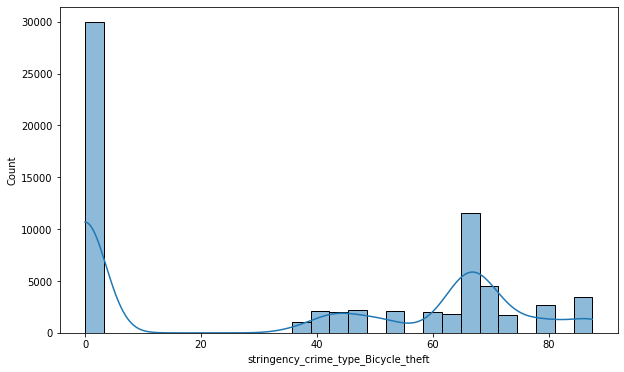

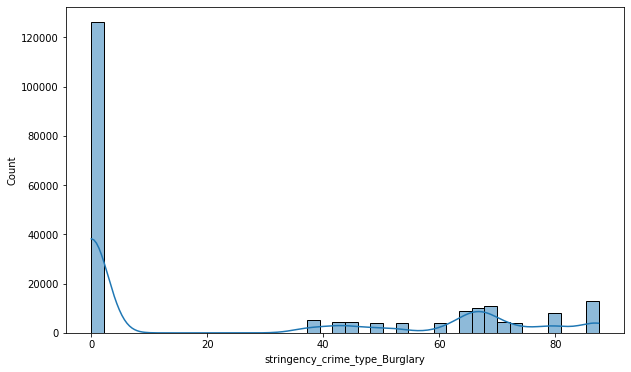

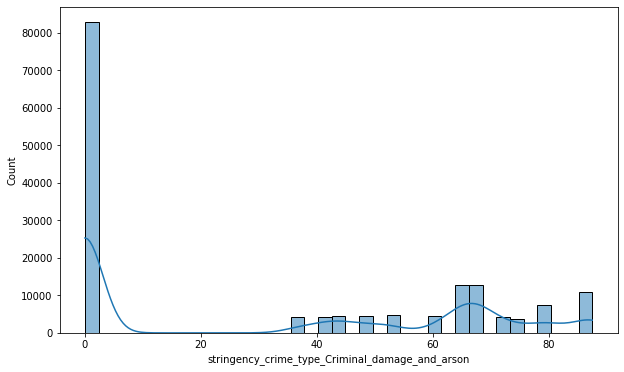

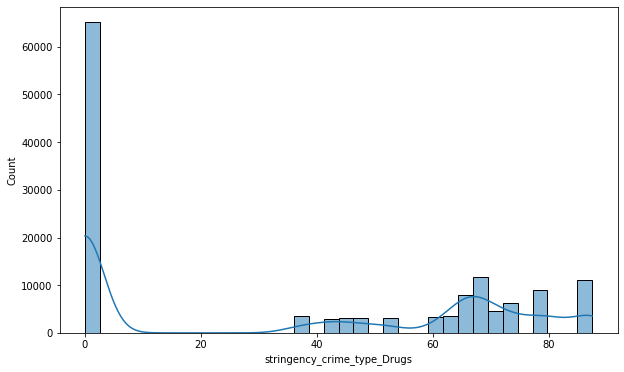

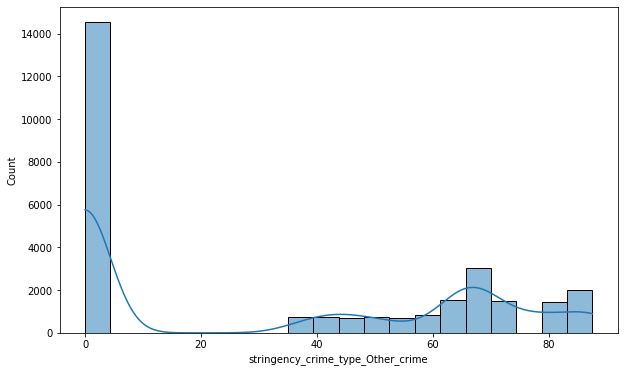

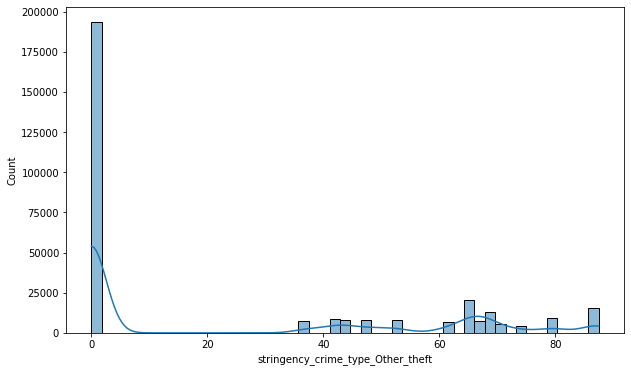

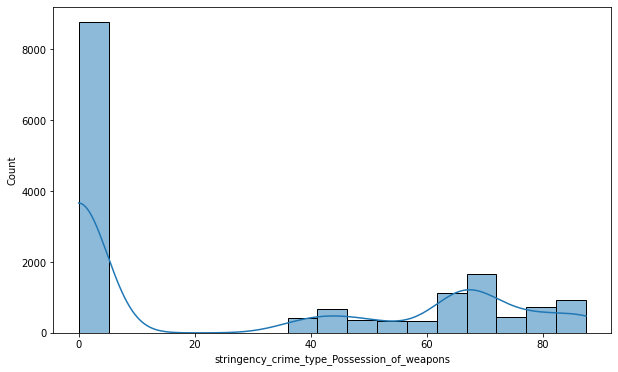

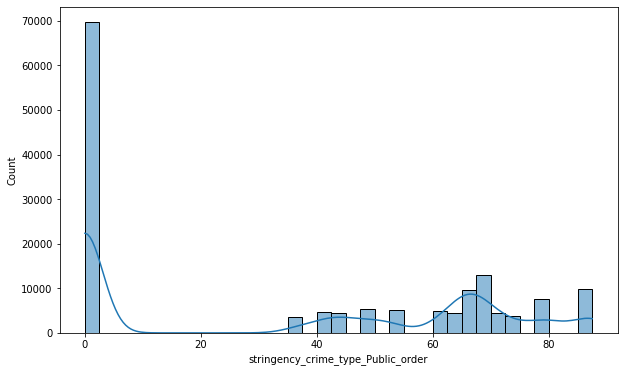

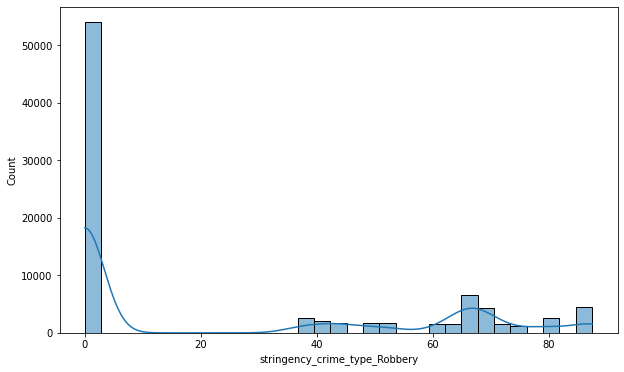

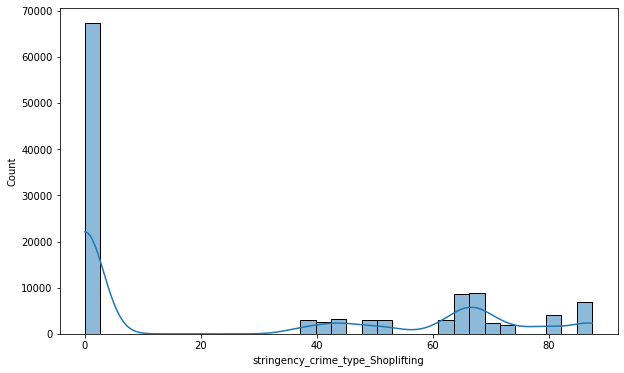

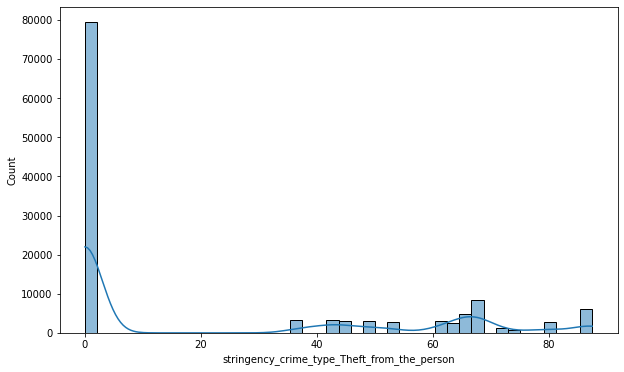

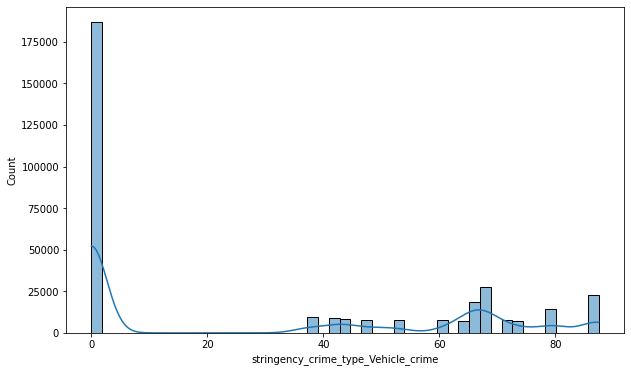

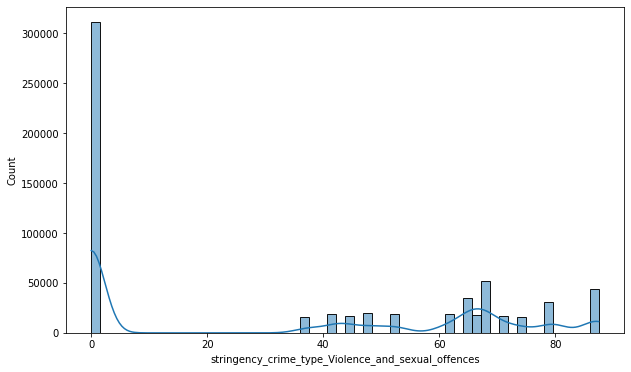

In [ ]:
#pllotting the distribution of total crime over stringency
for col in new_columns:
  feature = df_balanced[df_balanced[f'{col}'] == 1][['stringency', f'{col}']]
  plt.figure(figsize = (10, 6))
  # ax = sns.distplot(feature['stringency'])
  ax = sns.histplot(feature['stringency'], kde=True)
  ax.set(xlabel = f'stringency_{col}')
  
  #Based on the frequency distrbution of crimes by stringency, we can see that stringency 0 dominates the stringency values. 
  #We will analyze the data with stringency as a binary variable (pre- vs pandemic)

#Logistic regression predicting covid variable from crime counts per month

In [ ]:
#Logistic regression predicting binarized stringency (covid variable) from crime counts per month

In [ ]:
target_covid = data_encoded.groupby('month')['covid'].mean()
features_covid = data_encoded.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [ ]:
features_covid

crime_type_Bicycle_theft  ...  crime_type_Violence_and_sexual_offences
month                              ...                                         
2018-01                    1154.0  ...                                  15663.0
2018-02                    1023.0  ...                                  14212.0
2018-03                    1025.0  ...                                  16340.0
2018-04                    1344.0  ...                                  15480.0
2018-05                    1803.0  ...                                  17366.0
2018-06                    1905.0  ...                                  17411.0
2018-07                    2331.0  ...                                  18696.0
2018-08                    2096.0  ...                                  16047.0
2018-09                    2203.0  ...                                  16228.0
2018-10                    2168.0  ...                                  16742.0
2018-11                    1539.0  ...                                  16331.0
2018-12                    1080.0  ...                                  16188.0
2019-01                    1266.0  ...                                  15933.0
2019-02                    1199.0  ...                                  15250.0
2019-03                    1470.0  ...                                  17172.0
2019-04                    1632.0  ...                                  15767.0
2019-05                    1915.0  ...                                  17021.0
2019-06                    1926.0  ...                                  17313.0
2019-07                    2058.0  ...                                  18111.0
2019-08                    1730.0  ...                                  16077.0
2019-09                    1623.0  ...                                  16357.0
2019-10                    1605.0  ...                                  16638.0
2019-11                    1249.0  ...                                  16392.0
2019-12                     942.0  ...                                  15857.0
2020-01                    1187.0  ...                                  16156.0
2020-02                    1063.0  ...                                  15602.0
2020-03                    1086.0  ...                                  16134.0
2020-04                    1055.0  ...                                  13714.0
2020-05                    1756.0  ...                                  15778.0
2020-06                    2544.0  ...                                  16879.0
2020-07                    2817.0  ...                                  18222.0
2020-08                    3041.0  ...                                  18381.0
2020-09                    3086.0  ...                                  17585.0
2020-10                    2638.0  ...                                  16891.0
2020-11                    2016.0  ...                                  16435.0
2020-12                    1310.0  ...                                  15551.0
2021-01                    1047.0  ...                                  14150.0
2021-02                    1102.0  ...                                  14080.0
2021-03                    1602.0  ...                                  17425.0
2021-04                    1820.0  ...                                  16842.0
2021-05                    2031.0  ...                                  19080.0
2021-06                    2075.0  ...                                  19359.0
2021-07                    2180.0  ...                                  19729.0
2021-08                    1980.0  ...                                  17282.0
2021-09                    2157.0  ...                                  18757.0

[45 rows x 13 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_covid, target_covid, test_size = 0.2, random_state=5)

##Analyzing feature importance for crime types monthly count when target variable is covid (binarized stringency)

In [ ]:
#Analyzing feature importance for crime types monthly count when target variable is covid (binarized stringency)
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest


In [ ]:
y_cov =  y_train.values
X_cov = X_train.values
print(X_cov)
print(y_cov)

[[ 1187.  6849.  4266.  4213.   768.  9473.   496.  3615.  3007.  3780.
   4240. 11814. 16156.]
 [ 1905.  6043.  4708.  2383.   788.  9095.   513.  3839.  2577.  3633.
   3604.  8894. 17411.]
 [ 1154.  7548.  4797.  2828.   836.  8897.   518.  3130.  2586.  3826.
   3557.  9339. 15663.]
 [ 2544.  4261.  4246.  4560.   769.  5312.   394.  4468.  1550.  2358.
   1183.  8002. 16879.]
 [ 1025.  6306.  4501.  2495.   831.  8814.   505.  3553.  2331.  3674.
   3597.  8845. 16340.]
 [  942.  6568.  4112.  3111.   721.  9824.   411.  3521.  2948.  3349.
   4347. 10208. 15857.]
 [ 1980.  4272.  4395.  3099.   681.  7989.   318.  4389.  1731.  3140.
   3141.  8550. 17282.]
 [ 3041.  4951.  4596.  3449.   676.  7560.   395.  4941.  2286.  2963.
   2521.  8820. 18381.]
 [ 1730.  5821.  3891.  4245.   719.  9050.   453.  3917.  2645.  3411.
   3706.  8230. 16077.]
 [ 1539.  7811.  4629.  2956.   807. 10607.   486.  3503.  2748.  3595.
   4352. 10339. 16331.]
 [ 2031.  4137.  4547.  3331.   821.  66

In [ ]:


test_cov = SelectKBest(score_func=chi2, k='all')
fit_cov = test_cov.fit(X_cov, y_cov)
fit_cov.scores_

array([ 1119.30762566,  6732.07650105,   148.98663364,   709.38424593,
          23.79862671, 12903.81932244,   241.10384451,   873.947215  ,
        3401.21180606,  2195.05669994,  7013.33153786,  1732.11148473,
         186.8729173 ])

In [ ]:
fit_cov.pvalues_

array([2.10143278e-245, 0.00000000e+000, 2.88710349e-034, 2.72306145e-156,
       1.06958746e-006, 0.00000000e+000, 2.25954193e-054, 4.52350907e-192,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.53085750e-042])

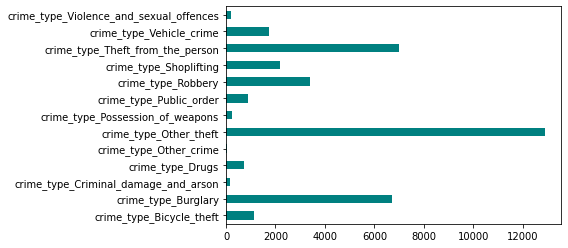

In [ ]:
feature_scores_plot = pd.Series(fit_cov.scores_, new_columns)
feature_scores_plot.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
k_best_scores_cov = np.sort(fit_cov.scores_)[-4:]
k_best_scores_cov

array([ 3401.21180606,  6732.07650105,  7013.33153786, 12903.81932244])

In [ ]:
dtype = [('score', float), ('column', 'S50')]
score_feature_cov = zip(fit_cov.scores_, new_columns)
score_feature_list_cov = list(score_feature_cov)
score_feature_array_cov = np.array(score_feature_list_cov, dtype = dtype)
score_sorted_cov = np.sort(score_feature_array_cov, order=['score', 'column'])
k_best_cov = score_sorted_cov[-4:]
k_best_cov
#.decode('ascii')

array([( 3401.21180606, b'crime_type_Robbery'),
       ( 6732.07650105, b'crime_type_Burglary'),
       ( 7013.33153786, b'crime_type_Theft_from_the_person'),
       (12903.81932244, b'crime_type_Other_theft')],
      dtype=[('score', '<f8'), ('column', 'S50')])

In [ ]:
#Analyzing feature importance with k=4 for crime types monthly count when target variable is covid (binarized stringency)
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest


In [ ]:
y_cov =  y_train.values
X_cov = X_train.values


In [ ]:


test_cov_4 = SelectKBest(score_func=chi2, k=4)
fit_cov_4 = test_cov_4.fit(X_cov, y_cov)
fit_cov_4.scores_

array([ 1119.30762566,  6732.07650105,   148.98663364,   709.38424593,
          23.79862671, 12903.81932244,   241.10384451,   873.947215  ,
        3401.21180606,  2195.05669994,  7013.33153786,  1732.11148473,
         186.8729173 ])

In [ ]:
fit_cov_4.pvalues_

array([2.10143278e-245, 0.00000000e+000, 2.88710349e-034, 2.72306145e-156,
       1.06958746e-006, 0.00000000e+000, 2.25954193e-054, 4.52350907e-192,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.53085750e-042])

In [ ]:
k_best = test_cov_4.get_feature_names_out(new_columns)
k_best

array(['crime_type_Burglary', 'crime_type_Other_theft',
       'crime_type_Robbery', 'crime_type_Theft_from_the_person'],
      dtype=object)

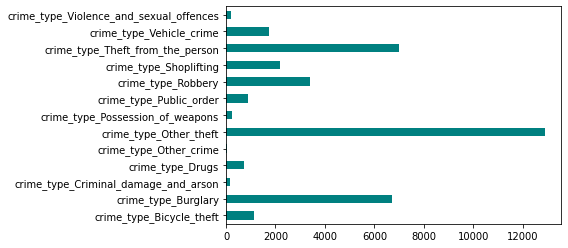

In [ ]:
feature_scores_plot = pd.Series(fit_cov.scores_, new_columns)
feature_scores_plot.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
k_best_scores_cov = np.sort(fit_cov.scores_)[-4:]
k_best_scores_cov

array([ 3401.21180606,  6732.07650105,  7013.33153786, 12903.81932244])

##Logistic regression on monthly crime count over months by type with binarized stringency (covid variable) as target 

In [ ]:
#Logistic regression on monthly crime count by type with binarized stringency (covid variable) as target 


In [ ]:
X_train.shape

(36, 13)

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logit.coef_.shape

(1, 13)

In [ ]:
# Predict labels on the Test set of independent variables
pred_logit = logit.predict(X_test)

# Predict probabilities on the Test set of independent variables
proba_logit = logit.predict_proba(X_test)

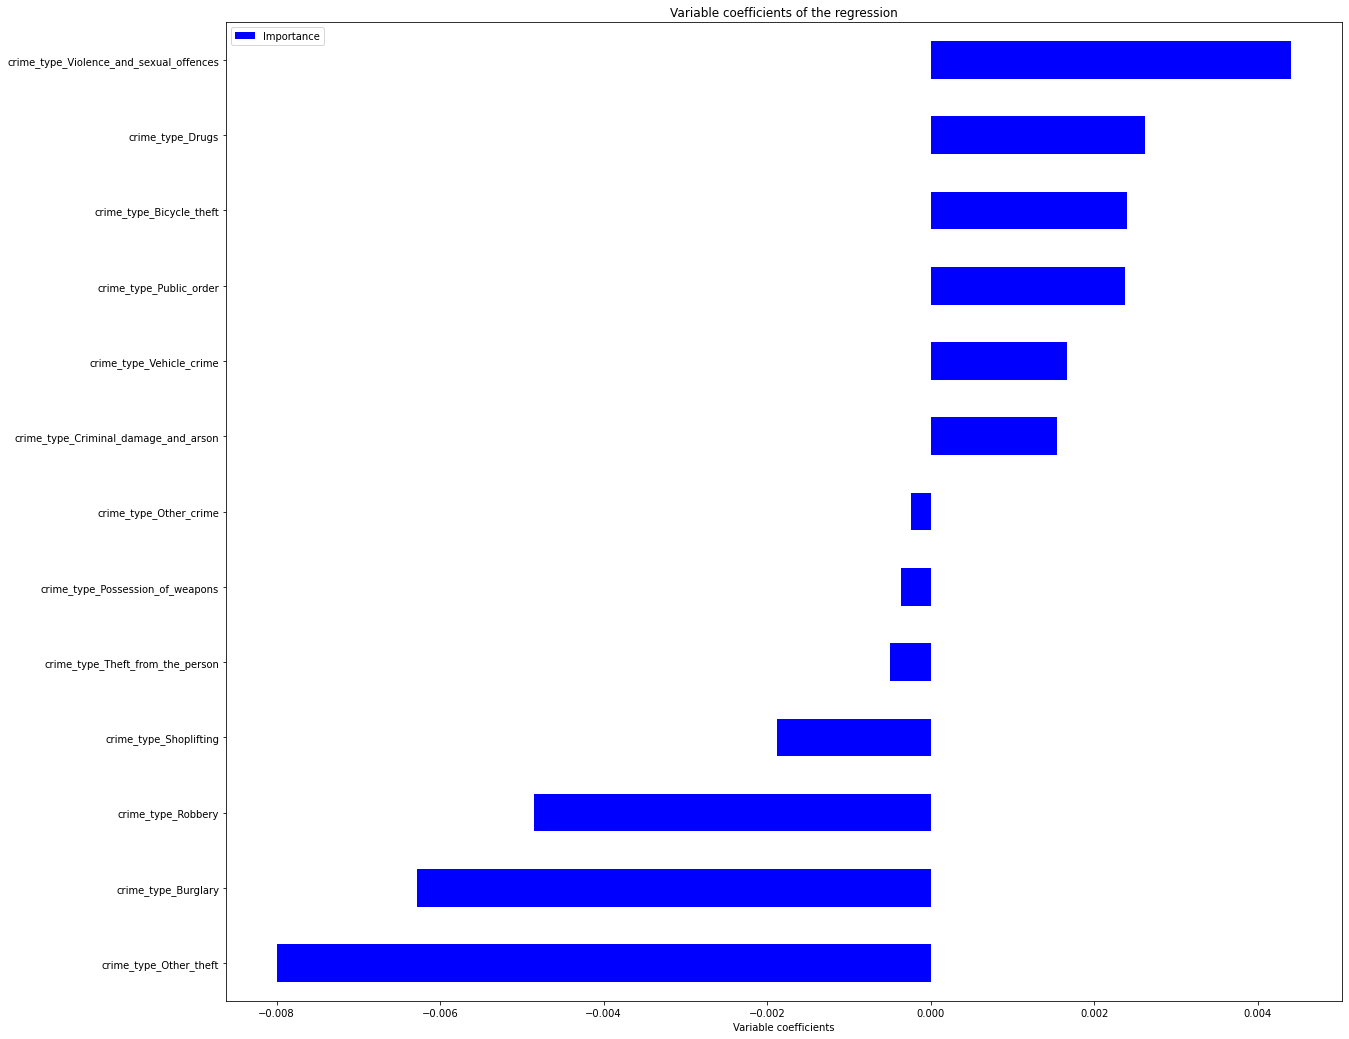

In [ ]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((13, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])

coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the regression')
plt.show()

In [ ]:
from IPython.display import Math
from itertools import product

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score)

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
thres = 0.5
target_predict_logit = np.where(proba_logit[:,1] > thres, 1, 0)
target_actual = y_test

In [ ]:
# Actual "positive" cases in train/test dataset? 

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 41.67% (15/36)
% positive in test set (count/total): 44.44% (4/9)


In [ ]:
# Predicted "positive" cases

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 44.44% (4/9)


In [ ]:
# This is a function to 'prettify' confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[5 0]
 [0 4]]
Normalized confusion matrix
[[100.   0.]
 [  0. 100.]]


<Figure size 432x288 with 0 Axes>

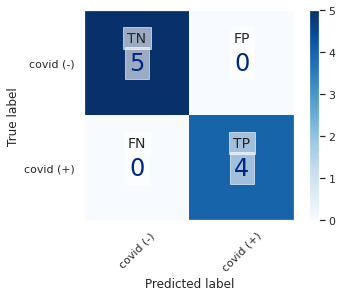

<Figure size 432x288 with 0 Axes>

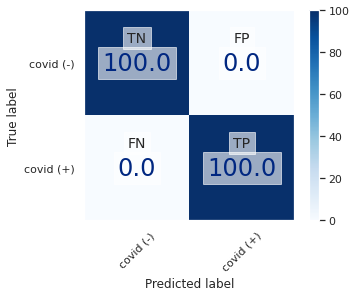

<Figure size 432x288 with 0 Axes>

In [ ]:
class_names = ['covid (-)', 'covid (+)']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [ ]:
print("Accuracy:", accuracy_score(y_test, pred_logit))
print("Precision:", precision_score(y_test, pred_logit))
print("Recall:", recall_score(y_test, pred_logit))

#It is possible to perfectly predict pandemic from crime counts

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


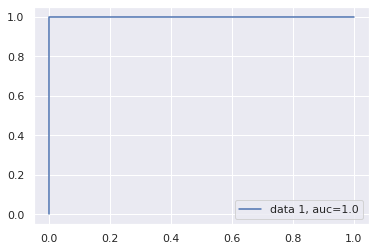

In [ ]:
#ROC curve
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

######Our model perfectly discriminates between pre-pandemic and pandemic based on crime counts, AUC score is 1.0

#Logistic regression on k=4 most important crime types monthly count over balanced months with binarized stringency (covid variable) as target

In [ ]:
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_covid[k_best], target_covid, test_size = 0.2, random_state=5)

In [ ]:
X_train.shape

(36, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Let's compute the logistic regression
# Initiate your logistic model
logit = LogisticRegression()
# Fit your logistic regression model to your train model
logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logit.coef_.shape

(1, 4)

In [ ]:
# Predict labels on your Test set of independent variables
#will this row be in 50k or under 50k category
pred_logit = logit.predict(X_test)

# Predict probabilities on your Test set of independent variables
#this will give us probabilities, how confident we are in those answears
proba_logit = logit.predict_proba(X_test)

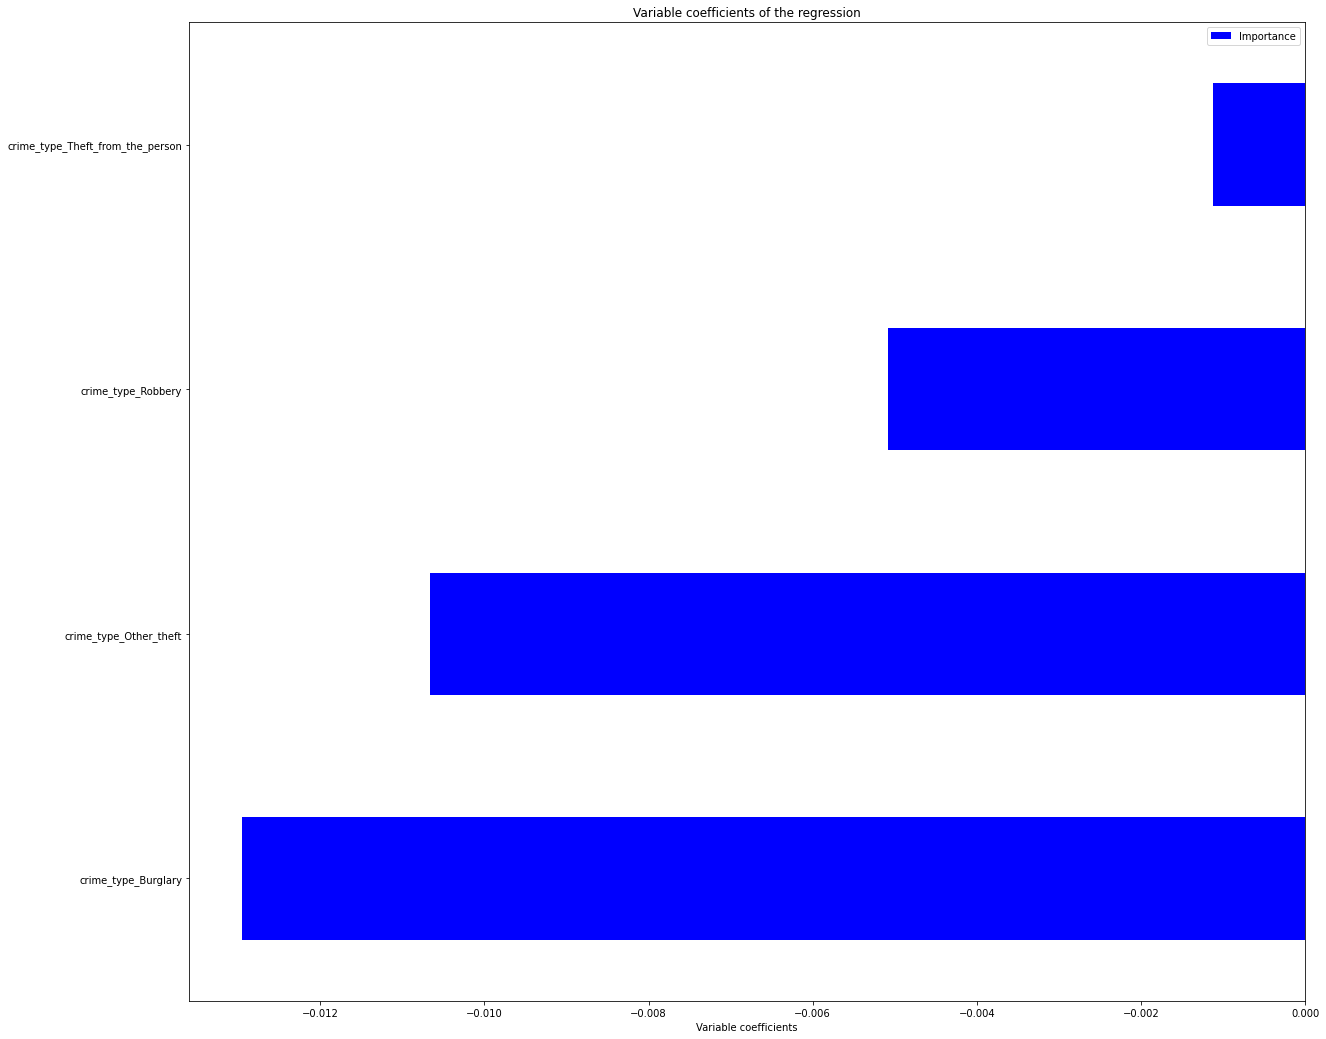

In [ ]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((4, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])

coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the regression')
plt.show()

In [ ]:
from IPython.display import Math
from itertools import product


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, confusion_matrix, roc_curve, roc_auc_score,
                             accuracy_score, precision_score, recall_score)

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
thres = 0.5
target_predict_logit = np.where(proba_logit[:,1] > thres, 1, 0)
target_actual = y_test

In [ ]:
# Actual "positive" cases in train/test dataset 

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()

print('% positive in train set (count/total): {:.2f}% ({}/{})'
      .format(train_pos_count * 100.0 / len(y_train), train_pos_count, len(y_train)))
print('% positive in test set (count/total): {:.2f}% ({}/{})'
      .format(test_pos_count * 100.0 / len(y_test), test_pos_count, len(y_test)))

% positive in train set (count/total): 41.67% (15/36)
% positive in test set (count/total): 44.44% (4/9)


In [ ]:
# Predicted "positive" cases 

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 44.44% (4/9)


In [ ]:
# This is a function to 'prettify' confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          axis=1,
                          figsize=(5,4), 
                          fontsize=14,
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Note that normalization here by default occurs across axis=1, or across each row (true class). 
    """
    
    if normalize:
        if axis == 1:
            cm = cm.astype('float') / cm.sum(axis=axis)[:, np.newaxis] * 100
        elif axis == 0:
            cm = cm.astype('float') / cm.sum(axis=axis)[np.newaxis, :] * 100
        else:
            raise ValueError("axis must be 0 or 1")
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig = plt.figure(figsize=figsize)
    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    q_labels = ['TN', 'FP', 'FN', 'TP']
    quad_font_size = 14
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    q_i = 0
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        
        q = plt.text(j, i-0.2, q_labels[q_i], horizontalalignment='center', fontsize=quad_font_size)
        q_i += 1
        q.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        
        t = plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                     verticalalignment="center",
                 color="#002781",
                    fontsize=fontsize)
        t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='white'))
        

    plt.tight_layout(h_pad=10, w_pad=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return None

Confusion matrix, without normalization
[[5 0]
 [0 4]]
Normalized confusion matrix
[[100.   0.]
 [  0. 100.]]


<Figure size 432x288 with 0 Axes>

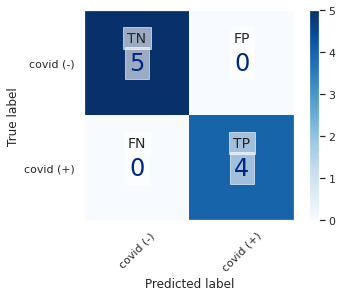

<Figure size 432x288 with 0 Axes>

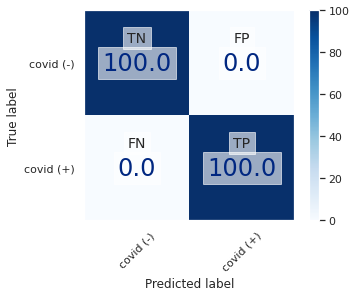

<Figure size 432x288 with 0 Axes>

In [ ]:
class_names = ['covid (-)', 'covid (+)']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [ ]:
print("Accuracy:", accuracy_score(y_test, pred_logit))
print("Precision:", precision_score(y_test, pred_logit))
print("Recall:", recall_score(y_test, pred_logit))

#It is possible to perfectly predict pandemic from crime counts

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


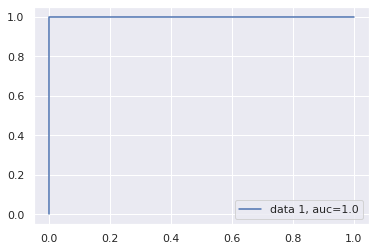

In [ ]:
#ROC curve
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

######Our model perfectly discriminates between pre-pandemic and pandemic based on crime counts when using k-best features, the AUC score is 1.0

##k-fold cross-validation

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
 


In [ ]:
acc_score = []
for train_index , test_index in kfold.split(features_covid):
    X_train , X_test = features_covid.iloc[train_index,:],features_covid.iloc[test_index,:]
    y_train , y_test = target_covid[train_index] , target_covid[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

acc_score

print('5-fold cross validation gave following accuracy scores', acc_score)     

5-fold cross validation gave following accuracy scores [1.0, 1.0, 1.0, 1.0, 1.0]


# We will now focus on the pandemic period to see if stringency of covid measures as a continuous variable is related to crime types

##Stringency by monthly total crime counts

In [ ]:
df_balanced

month  ...  crime_type_Violence_and_sexual_offences
9781     2018-08  ...                                        0
9782     2018-08  ...                                        0
9783     2018-08  ...                                        0
9784     2018-08  ...                                        0
9785     2018-08  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2395166 rows x 16 columns]

In [ ]:
london_pandemic = df_balanced[df_balanced['stringency'] > 0]
london_pandemic['stringency'].value_counts()

86.885161    103080
67.560333     64580
65.611379     64442
67.901333     64270
48.179000     63982
42.034000     63895
65.184000     63679
52.539310     63247
61.156333     61347
43.980000     60967
37.484000     60812
68.100690     59213
79.536000     56772
70.978966     56526
64.303103     55805
74.045000     51756
87.480370     47535
79.630000     44265
Name: stringency, dtype: int64

In [ ]:
london_pandemic.groupby('month')['stringency'].mean()

month
2020-03    37.484000
2020-04    79.630000
2020-05    74.045000
2020-06    70.978966
2020-07    65.184000
2020-08    67.560333
2020-09    65.611379
2020-10    67.901333
2020-11    68.100690
2020-12    86.885161
2021-01    86.885161
2021-02    87.480370
2021-03    79.536000
2021-04    64.303103
2021-05    61.156333
2021-06    52.539310
2021-07    48.179000
2021-08    43.980000
2021-09    42.034000
Name: stringency, dtype: float64

In [ ]:
crimes_by_stringency_by_month = london_pandemic.groupby('month')['stringency'].value_counts()
crimes_by_stringency_by_month

month    stringency
2020-03  37.484000     60812
2020-04  79.630000     44265
2020-05  74.045000     51756
2020-06  70.978966     56526
2020-07  65.184000     63679
2020-08  67.560333     64580
2020-09  65.611379     64442
2020-10  67.901333     64270
2020-11  68.100690     59213
2020-12  86.885161     55122
2021-01  86.885161     47958
2021-02  87.480370     47535
2021-03  79.536000     56772
2021-04  64.303103     55805
2021-05  61.156333     61347
2021-06  52.539310     63247
2021-07  48.179000     63982
2021-08  43.980000     60967
2021-09  42.034000     63895
Name: stringency, dtype: int64

In [ ]:
crimes_stringency_month_df = crimes_by_stringency_by_month.sort_index(level=[1, 0]).to_frame()
crimes_stringency_month_df

stringency
month   stringency            
2020-03 37.484000        60812
2021-09 42.034000        63895
2021-08 43.980000        60967
2021-07 48.179000        63982
2021-06 52.539310        63247
2021-05 61.156333        61347
2021-04 64.303103        55805
2020-07 65.184000        63679
2020-09 65.611379        64442
2020-08 67.560333        64580
2020-10 67.901333        64270
2020-11 68.100690        59213
2020-06 70.978966        56526
2020-05 74.045000        51756
2021-03 79.536000        56772
2020-04 79.630000        44265
2020-12 86.885161        55122
2021-01 86.885161        47958
2021-02 87.480370        47535

In [ ]:
crimes_stringency_month_df.rename({'stringency': 'crime_count'}, axis = 1, inplace = True)
crimes_stringency_month_df.reset_index(level='stringency', inplace = True)

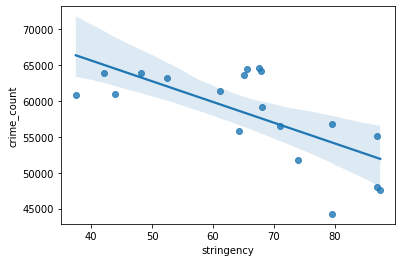

In [ ]:
sns.regplot(data = crimes_stringency_month_df, x = crimes_stringency_month_df['stringency'], y = crimes_stringency_month_df['crime_count'])

In [ ]:
#Crimes total by month is highly negatively correlated with stringency
crimes_stringency_month_df.corr()

stringency  crime_count
stringency     1.000000    -0.689678
crime_count   -0.689678     1.000000

##Montly crime counts by type and stringency

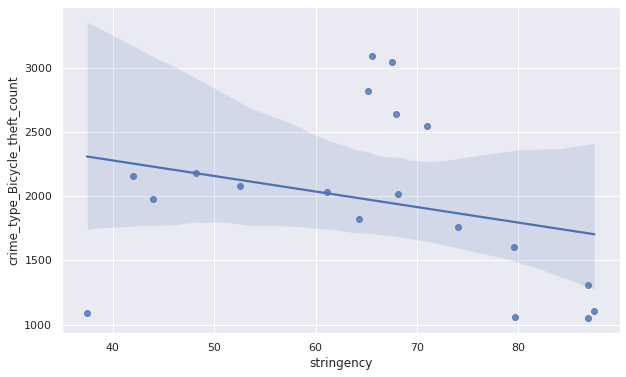

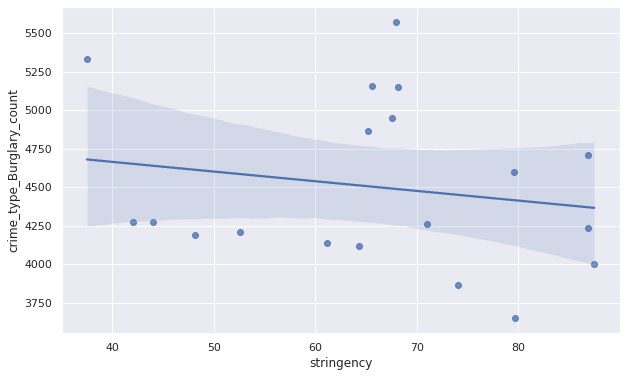

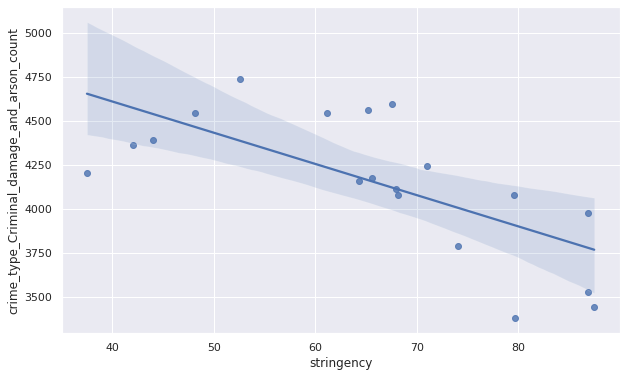

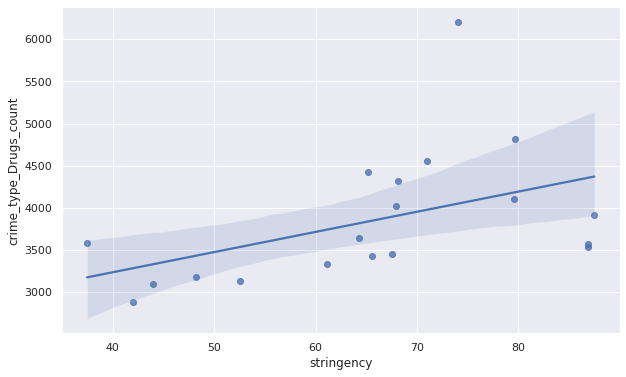

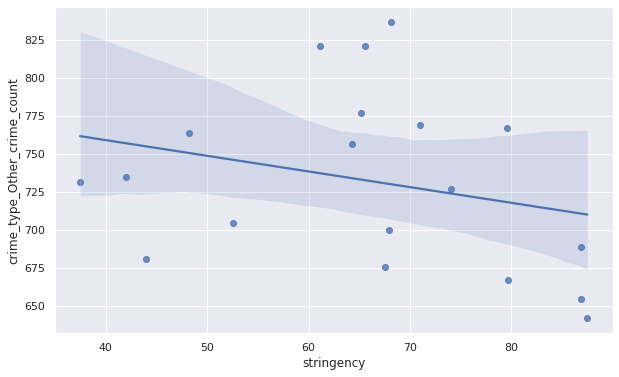

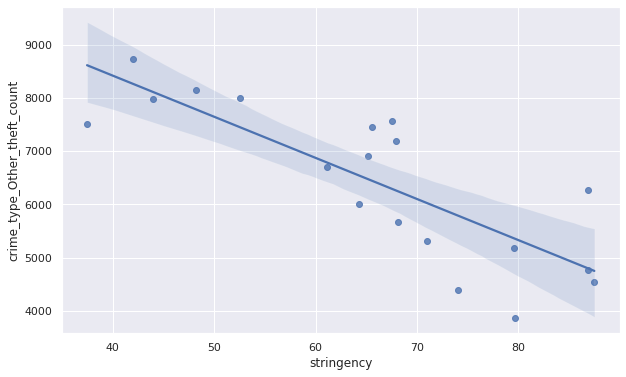

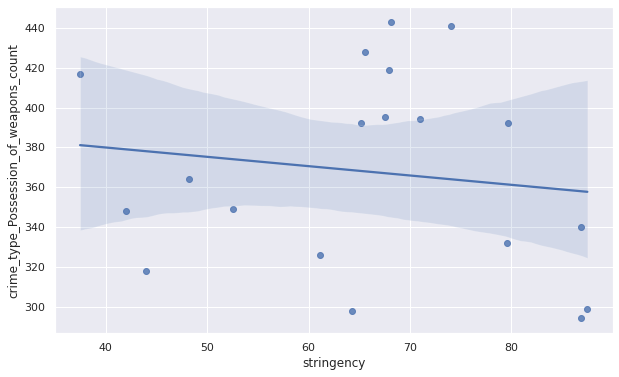

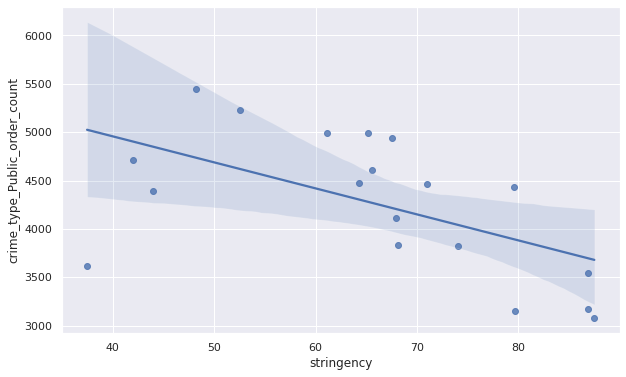

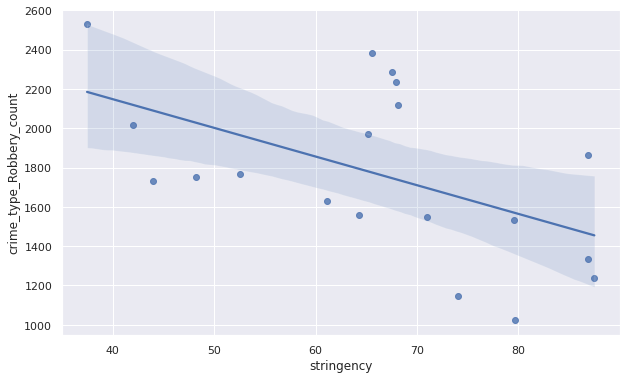

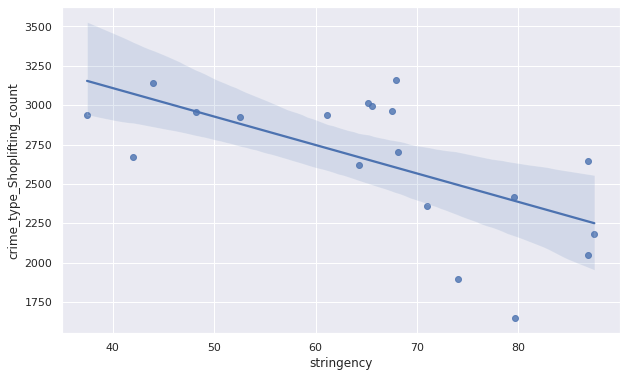

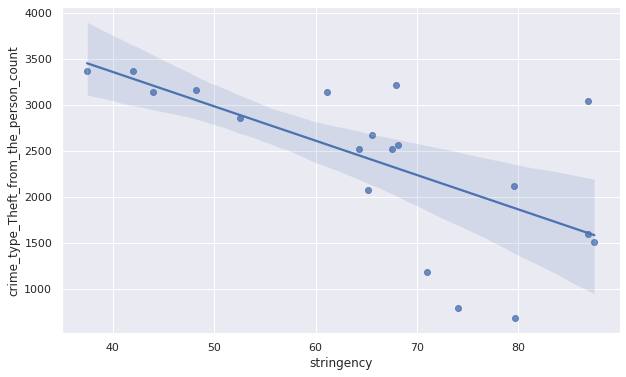

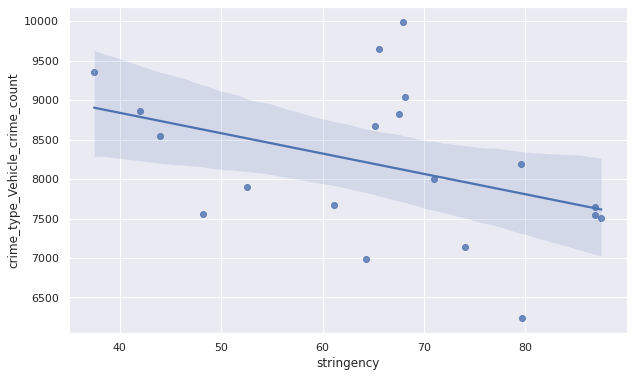

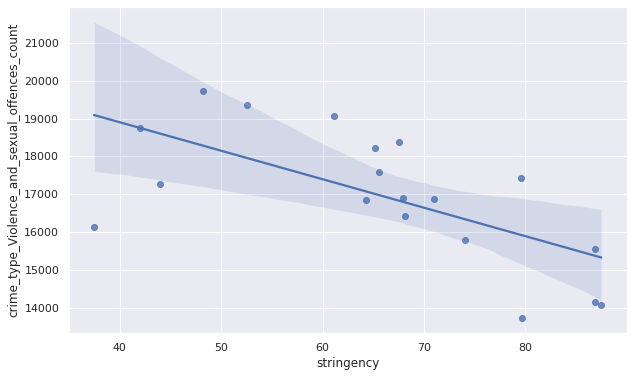

In [ ]:
for col in new_columns:
  crime_df = london_pandemic[london_pandemic[f'{col}'] == 1].groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
  crime_df.rename({'stringency': f'{col}_count'}, axis = 1, inplace = True)
  crime_df.reset_index(level='stringency', inplace = True)
  plt.figure(figsize = (10, 6))
  ax = sns.regplot(data = crime_df, x = crime_df['stringency'], y = crime_df[f'{col}_count'])

##Dsitribution of stringency by month

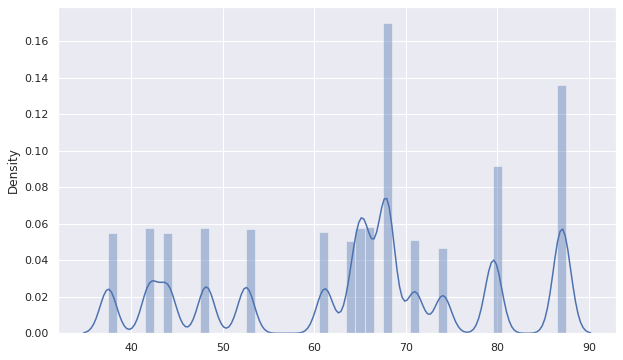

In [ ]:
london_pandemic
plt.figure(figsize = (10, 6))
ax = sns.distplot(x = london_pandemic['stringency'])

##Relationship between monthly crime count and stringency over the pandemic period - regression

In [ ]:
#Relationship between monthly crime count and stringency - regression 

In [ ]:
target_pan = london_pandemic.groupby('month')['stringency'].mean()
features_pan = london_pandemic.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()


In [ ]:
cr_count_pandemic_df = pd.concat((features_pan, target_pan), axis = 1)

In [ ]:
cr_count_pandemic_df.corr()


crime_type_Bicycle_theft  ...  stringency
crime_type_Bicycle_theft                                 1.000000  ...   -0.279982
crime_type_Burglary                                      0.426907  ...   -0.179445
crime_type_Criminal_damage_and_arson                     0.672712  ...   -0.686787
crime_type_Drugs                                        -0.121078  ...    0.468075
crime_type_Other_crime                                   0.453500  ...   -0.271226
crime_type_Other_theft                                   0.532136  ...   -0.810079
crime_type_Possession_of_weapons                         0.421240  ...   -0.144349
crime_type_Public_order                                  0.731858  ...   -0.565989
crime_type_Robbery                                       0.534690  ...   -0.524220
crime_type_Shoplifting                                   0.611911  ...   -0.627418
crime_type_Theft_from_the_person                         0.259937  ...   -0.656672
crime_type_Vehicle_crime                                 0.561700  ...   -0.404988
crime_type_Violence_and_sexual_offences                  0.678731  ...   -0.649222
stringency                                              -0.279982  ...    1.000000

[14 rows x 14 columns]

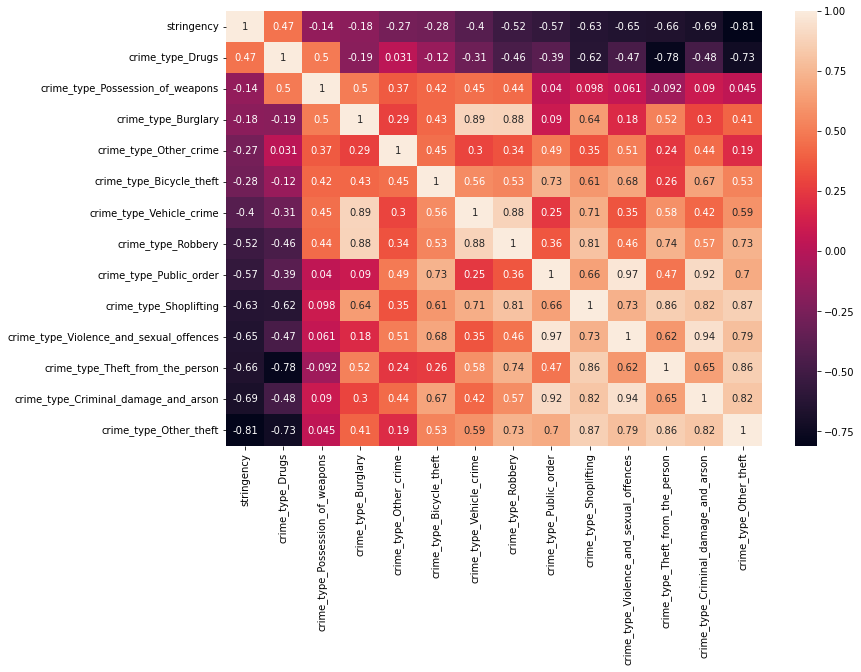

In [ ]:
k = 14
cols = cr_count_pandemic_df.corr().nlargest(k, 'stringency')['stringency'].index

cm = cr_count_pandemic_df[cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)

In [ ]:
#Linear regression on crime counts per month and stringency during pandemic

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_pan, target_pan, test_size = 0.2, random_state = 42)

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_prediction =  model.predict(x_test)
y_prediction

array([ 62.26035021,  95.0250211 , 106.96564441,  86.13041637])

In [ ]:
coeffs = zip(cols, model.coef_)


In [ ]:
print("Coefficients: \n")
for coeff in coeffs:
  print(coeff)
print("\nIntercept: \n", model.intercept_)


Coefficients: 

('stringency', 0.01205221517748731)
('crime_type_Drugs', -0.002509871615565675)
('crime_type_Possession_of_weapons', -0.05866121684282305)
('crime_type_Burglary', -0.0029465351759357292)
('crime_type_Other_crime', -0.20574580699931705)
('crime_type_Bicycle_theft', -0.019936061025294494)
('crime_type_Vehicle_crime', -0.1728284699328028)
('crime_type_Robbery', -0.07336232921541705)
('crime_type_Public_order', 0.08629184599614645)
('crime_type_Shoplifting', 0.04975779758468662)
('crime_type_Violence_and_sexual_offences', -0.03017319023364469)
('crime_type_Theft_from_the_person', -0.02159229750405714)
('crime_type_Criminal_damage_and_arson', 0.042733010728094434)

Intercept: 
 207.4611548850131


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
y_pred = model.predict(x_test)  

mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE score is {}'.format(mae)) 
print('RMSE is {}'.format(rmse)) 
print('R2 score is {}'.format(r2)) 

#R2 is small and negative, our model does not fit the data well

The model performance for testing set
--------------------------------------
MAE score is 19.55668209847191
RMSE is 21.154833499075416
R2 score is -0.23783933169134142


##k-fold cross-validation - linear regression on pandemic data

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
 


In [ ]:
target_pan = london_pandemic.groupby('month')['stringency'].mean()
features_pan = london_pandemic.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2_scores = []
mae_scores = []
rmse_scores = []
for train_index , test_index in kfold.split(features_pan):
    X_train , X_test = features_pan.iloc[train_index,:],features_pan.iloc[test_index,:]
    y_train , y_test = target_pan[train_index] , target_pan[test_index]
   
    #model = LinearRegression()
    model.fit(X_train, y_train)
    y_prediction =  model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
    y_pred = model.predict(X_test)  

    mae = mean_absolute_error(y_test, y_pred)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)      
    
    R2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)



print('5-fold cross validation gave following R2 scores', R2_scores)
print('mean R2', sum(R2_scores)/5)
print('5-fold cross validation gave following MAE scores', mae_scores)
print('mean MAE', sum(mae_scores)/5)
print('5-fold cross validation gave following RMSE scores', rmse_scores)
print('mean RMSE', sum(rmse_scores)/5)

#5-fold cross-validation showed that due to our subset being small and the target being not normally distributed our model fits data poorly

5-fold cross validation gave following R2 scores [-11.112934459058641, -0.2755218342547894, 0.1355344432210086, -2.28608787632993, 0.7202892750945462]
mean R2 -2.563744090265561
5-fold cross validation gave following MAE scores [15.733580983935472, 14.924590229032246, 6.531560944672503, 21.22806088605033, 3.478430946582968]
mean MAE 12.379244798054703
5-fold cross validation gave following RMSE scores [19.28368088872615, 16.936305996837365, 8.052393062019801, 22.364182074879942, 3.984198099053454]
mean RMSE 14.124152024303346


#Linear regression on crime counts per month and stringency during pandemic [5 most correlated features]

In [ ]:
#Linear regression on crime counts per month and stringency during pandemic [5 most correlated features]

In [ ]:
#5 most correlated features
cols[-5:]

Index(['crime_type_Theft_from_the_person', 'crime_type_Robbery',
       'crime_type_Burglary', 'crime_type_Shoplifting',
       'crime_type_Other_theft'],
      dtype='object')

In [ ]:
#Linear regression on crime counts per month and stringency during pandemic
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features_pan[cols[-5:]], target_pan, test_size = 0.2, random_state = 42)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
model = LinearRegression()
# fitting the training data
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_prediction =  model.predict(x_test)
y_prediction

array([65.24631548, 56.74934476, 79.06069735, 82.496514  ])

In [ ]:
coeffs = zip(cols[-5:], model.coef_)

In [ ]:
print("Coefficients: \n")
for coef in coeffs:
  print(coef)
print("\nIntercept: \n", model.intercept_)


Coefficients: 

('crime_type_Theft_from_the_person', 0.004981020236029447)
('crime_type_Robbery', -0.009824097837156025)
('crime_type_Burglary', 0.01576857989049442)
('crime_type_Shoplifting', -0.01067601902041786)
('crime_type_Other_theft', -0.007834002959577743)

Intercept: 
 79.43794809363746


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
y_pred = model.predict(x_test) # using the model we fitted earlier, we get predictions 

mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE score is {}'.format(mae)) # can range from 0 to ∞
print('RMSE is {}'.format(rmse)) # can range from 0 to ∞
print('R2 score is {}'.format(r2)) # 0 to 1

##The model using 5 most correlated features fits our data better, the R2 is now positive and has a larger absolute value. 
#R2 is small as the target - stringecy by month is not normally distributed and the data set is small

The model performance for testing set
--------------------------------------
MAE score is 12.464872768480847
RMSE is 15.546152506235277
R2 score is 0.33151617615275963


##k-fold cross-validation - linear regression on pandemic data with 5 most correlated features

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
 


In [ ]:
target_pan = london_pandemic.groupby('month')['stringency'].mean()
features_pan = london_pandemic.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [ ]:
list(cols[-5:])

['crime_type_Theft_from_the_person',
 'crime_type_Robbery',
 'crime_type_Burglary',
 'crime_type_Shoplifting',
 'crime_type_Other_theft']

In [ ]:
features_pan_5 = features_pan[list(cols[-5:])]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2_scores = []
mae_scores = []
rmse_scores = []
for train_index , test_index in kfold.split(features_pan_5):
    X_train , X_test = features_pan_5.iloc[train_index,:],features_pan_5.iloc[test_index,:]
    y_train , y_test = target_pan[train_index] , target_pan[test_index]
   
    #model = LinearRegression()
    model.fit(X_train, y_train)
    y_prediction =  model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
    y_pred = model.predict(X_test)  

    mae = mean_absolute_error(y_test, y_pred)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)      
    
    R2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)



print('5-fold cross validation gave following R2 scores', R2_scores)
print('mean R2', sum(R2_scores)/5)
print('5-fold cross validation gave following MAE scores', mae_scores)
print('mean MAE', sum(mae_scores)/5)
print('5-fold cross validation gave following RMSE scores', rmse_scores)
print('mean RMSE', sum(rmse_scores)/5)

#5-fold cross-validation showed that due to our subset being small and the target being not normally distributed our model with most correlated 5 features fits data better than the model with all features, but still poorly

5-fold cross validation gave following R2 scores [-1.0630837424010369, 0.5114478400742708, -1.0205171322003896, -0.45217548391038886, 0.9150888757137118]
mean R2 -0.2218479285447666
5-fold cross validation gave following MAE scores [7.064936575388689, 7.784564496064961, 8.344061678325993, 11.575744756025811, 1.8964366409804423]
mean MAE 7.33314882935718
5-fold cross validation gave following RMSE scores [7.958361832283634, 10.481663470802317, 12.310689778215345, 14.86698773279928, 2.195172534093554]
mean RMSE 9.562575069638827


#Stringency pre and during pandemic by total monthly crime counts

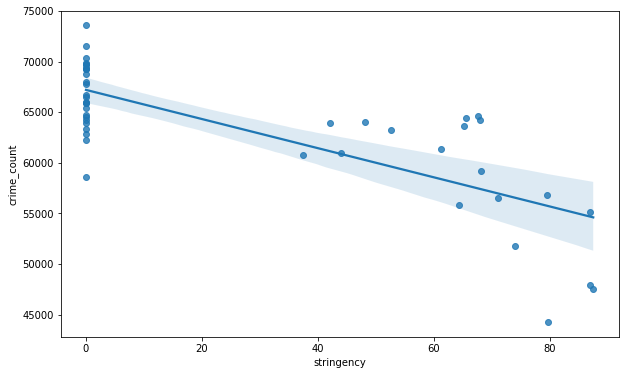

In [ ]:
london_balanced_ = data_encoded.groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
london_balanced_.rename({'stringency': 'crime_count'}, axis = 1, inplace = True)
london_balanced_.reset_index(level='stringency', inplace = True)
plt.figure(figsize = (10, 6))
ax = sns.regplot(data = london_balanced_, x = london_balanced_['stringency'], y = london_balanced_['crime_count'])

In [ ]:
london_balanced_.corr()
#Monthly crime total is very highly correlated to Covid-19 measures

stringency  crime_count
stringency     1.000000    -0.764979
crime_count   -0.764979     1.000000

##Stringency by monthly crime counts by type pre and during pandemic

In [ ]:
data_encoded

month  ...  crime_type_Violence_and_sexual_offences
0        2018-01  ...                                        0
1        2018-01  ...                                        0
2        2018-01  ...                                        0
3        2018-01  ...                                        0
4        2018-01  ...                                        0
...          ...  ...                                      ...
2844236  2021-09  ...                                        0
2844237  2021-09  ...                                        0
2844238  2021-09  ...                                        1
2844239  2021-09  ...                                        1
2844240  2021-09  ...                                        1

[2844241 rows x 16 columns]

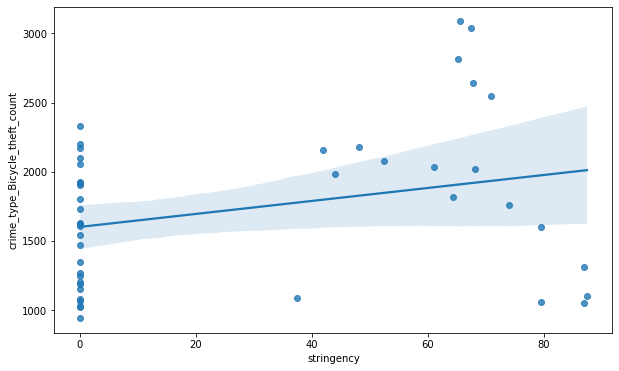

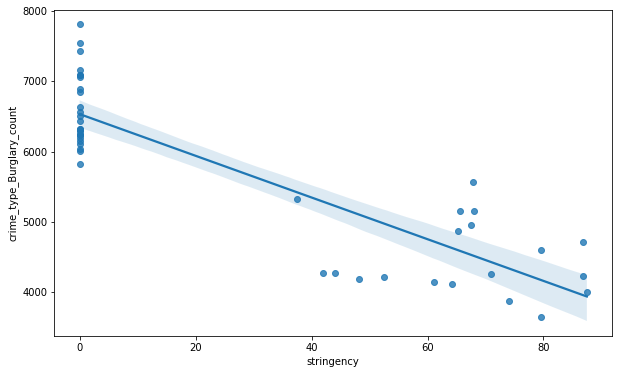

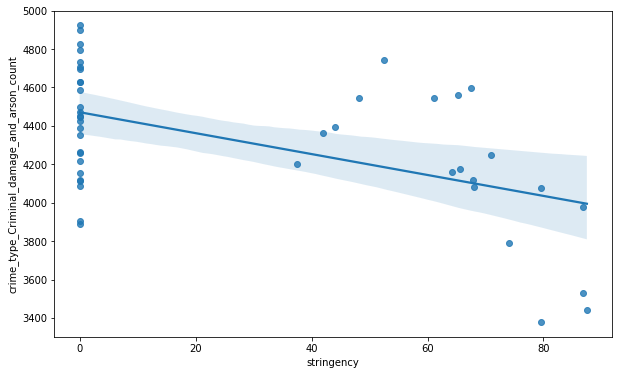

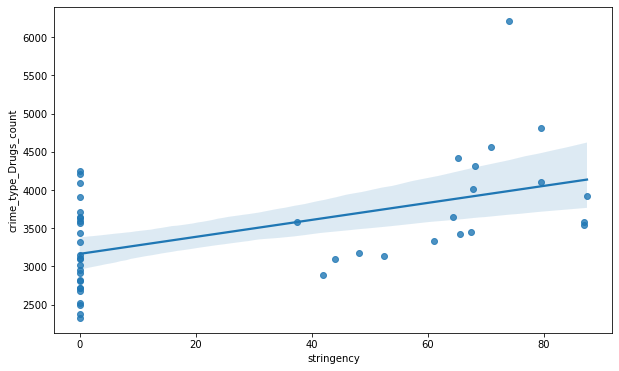

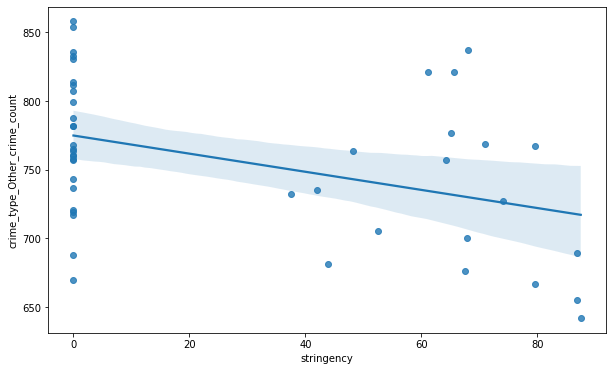

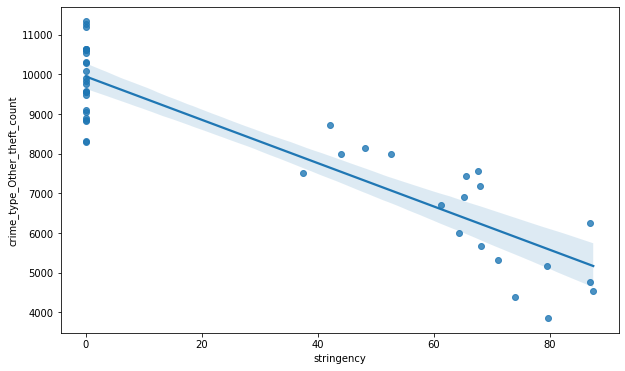

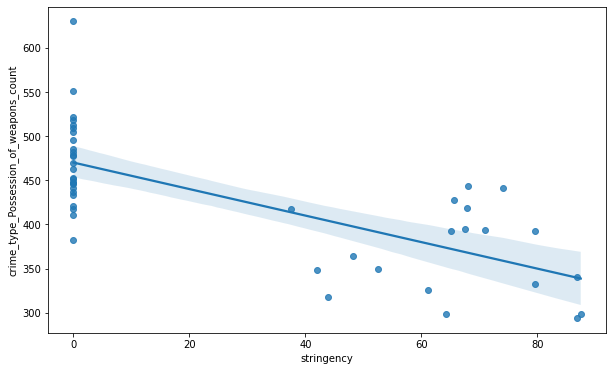

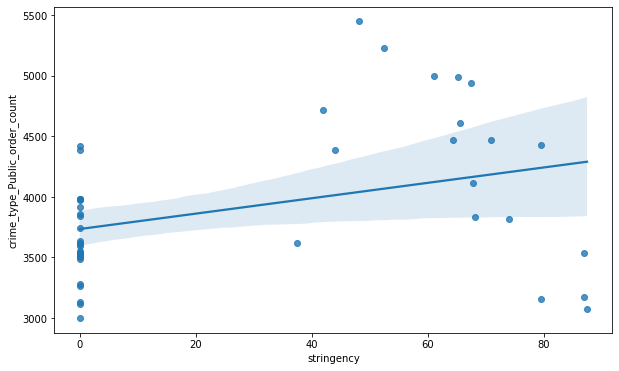

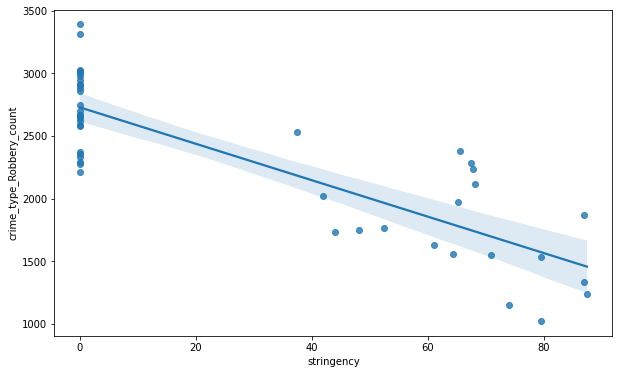

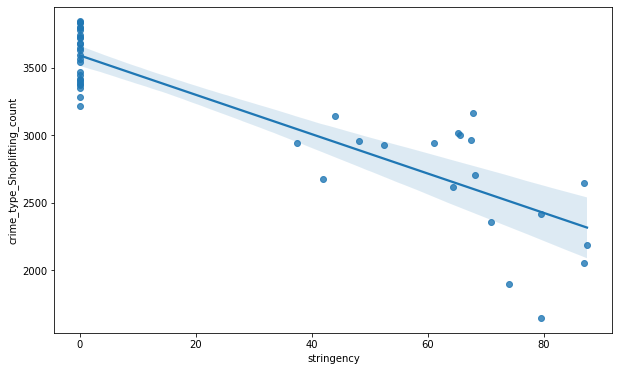

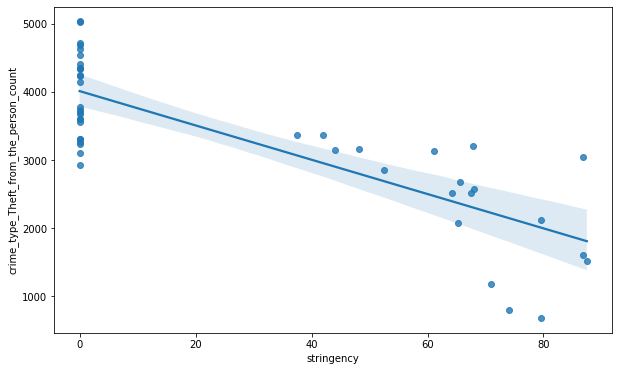

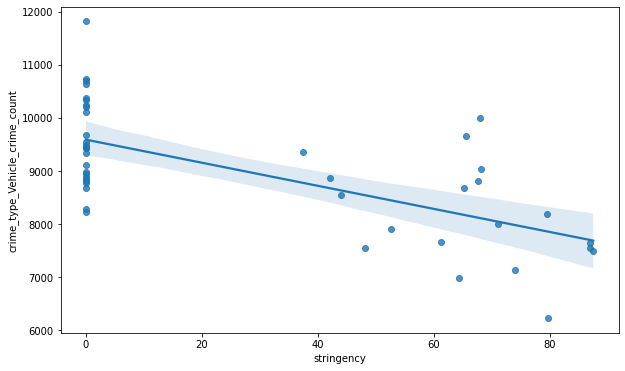

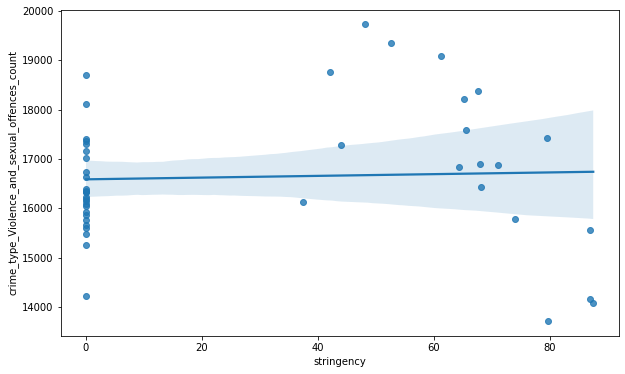

In [ ]:
for col in new_columns:
  crime_df = data_encoded[data_encoded[f'{col}'] == 1].groupby('month')['stringency'].value_counts().sort_index(level=[1, 0]).to_frame()
  crime_df.rename({'stringency': f'{col}_count'}, axis = 1, inplace = True)
  crime_df.reset_index(level='stringency', inplace = True)
  plt.figure(figsize = (10, 6))
  ax = sns.regplot(data = crime_df, x = crime_df['stringency'], y = crime_df[f'{col}_count'])

#Mothly crime counts were affected differently depending on the type of crime

##Relationship between monthly crime counts by type and stringency pre- and during pandemic

In [ ]:
target = data_encoded.groupby('month')['stringency'].mean()
features = data_encoded.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()


In [ ]:
crime_count_df = pd.concat((features, target), axis = 1)

In [ ]:
crime_count_df.corr()


crime_type_Bicycle_theft  ...  stringency
crime_type_Bicycle_theft                                 1.000000  ...    0.283576
crime_type_Burglary                                     -0.293872  ...   -0.872104
crime_type_Criminal_damage_and_arson                     0.316181  ...   -0.511257
crime_type_Drugs                                         0.078429  ...    0.518334
crime_type_Other_crime                                   0.249594  ...   -0.402159
crime_type_Other_theft                                  -0.080961  ...   -0.903141
crime_type_Possession_of_weapons                        -0.079309  ...   -0.712643
crime_type_Public_order                                  0.746570  ...    0.353530
crime_type_Robbery                                      -0.121395  ...   -0.834416
crime_type_Shoplifting                                  -0.077189  ...   -0.883787
crime_type_Theft_from_the_person                        -0.234823  ...   -0.805617
crime_type_Vehicle_crime                                -0.081097  ...   -0.651606
crime_type_Violence_and_sexual_offences                  0.691530  ...    0.044080
stringency                                               0.283576  ...    1.000000

[14 rows x 14 columns]

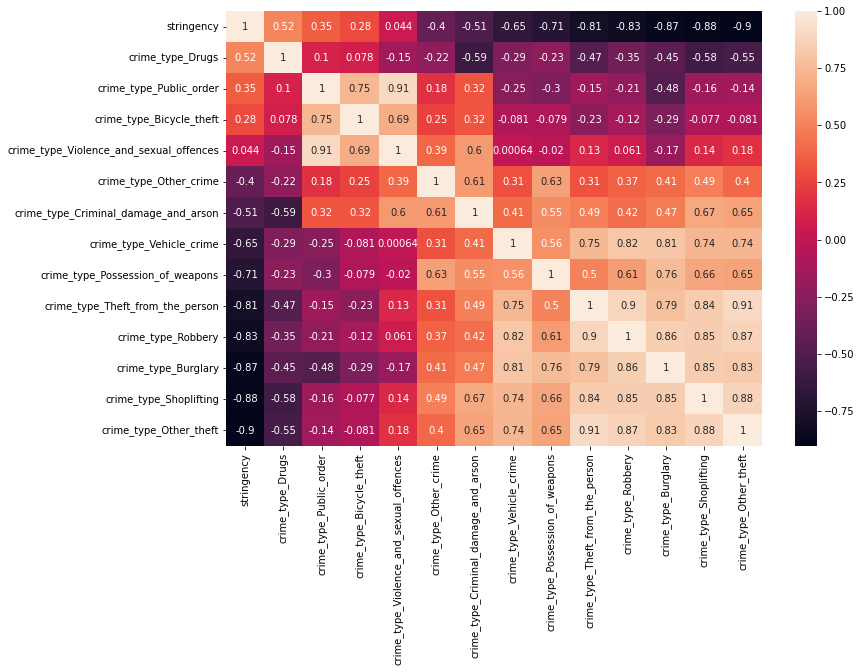

In [ ]:
k = 14
cols = crime_count_df.corr().nlargest(k, 'stringency')['stringency'].index
cm = crime_count_df[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)

In [ ]:
#Linear regression

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_prediction =  model.predict(x_test)
y_prediction

array([ 73.58511743,   3.83508744,  38.53530726,  51.83668907,
        62.71857483,  48.23522854, -13.04794519, -10.68090154,
        10.0200328 ])

In [ ]:
print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)


Coefficients: 
 [ 0.01676384 -0.00488038  0.02287894  0.00034212  0.00391095 -0.01332654
 -0.05476378  0.00941469 -0.0084858  -0.02901089  0.01625061  0.00626654
 -0.00805855]
Intercept: 
 158.20526784030372


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
y_pred = model.predict(x_test) 

mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE score is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2)) 

#Our model fits the data very well, R2 is very high (0.87), 
#it would be even higher if we would have used data balanced over months with respect to pre- and during pandemic, but because our data is limited in quantity we decided not to drop months from the pre-pandemic period

The model performance for testing set
--------------------------------------
MAE score is 9.360516170748943
RMSE is 11.30868446603344
R2 score is 0.8684064156109627


##k-fold cross-validation - linear regression on pandemic data

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
target = data_encoded.groupby('month')['stringency'].mean()
features = data_encoded.drop(['stringency', 'covid'], axis = 1).groupby('month').sum()

In [ ]:
target

month
2018-01     0.000000
2018-02     0.000000
2018-03     0.000000
2018-04     0.000000
2018-05     0.000000
2018-06     0.000000
2018-07     0.000000
2018-08     0.000000
2018-09     0.000000
2018-10     0.000000
2018-11     0.000000
2018-12     0.000000
2019-01     0.000000
2019-02     0.000000
2019-03     0.000000
2019-04     0.000000
2019-05     0.000000
2019-06     0.000000
2019-07     0.000000
2019-08     0.000000
2019-09     0.000000
2019-10     0.000000
2019-11     0.000000
2019-12     0.000000
2020-01     0.000000
2020-02     0.000000
2020-03    37.484000
2020-04    79.630000
2020-05    74.045000
2020-06    70.978966
2020-07    65.184000
2020-08    67.560333
2020-09    65.611379
2020-10    67.901333
2020-11    68.100690
2020-12    86.885161
2021-01    86.885161
2021-02    87.480370
2021-03    79.536000
2021-04    64.303103
2021-05    61.156333
2021-06    52.539310
2021-07    48.179000
2021-08    43.980000
2021-09    42.034000
Name: stringency, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

R2_scores = []
mae_scores = []
rmse_scores = []
for train_index , test_index in kfold.split(features):
    X_train , X_test = features.iloc[train_index,:],features.iloc[test_index,:]
    y_train , y_test = target[train_index] , target[test_index]
   
    #model = LinearRegression()
    model.fit(X_train, y_train)
    y_prediction =  model.predict(X_test)

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model evaluation for testing set
    y_pred = model.predict(X_test)  

    mae = mean_absolute_error(y_test, y_pred)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)      
    
    R2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)



print('5-fold cross validation gave following R2 scores', R2_scores)
print('mean R2', sum(R2_scores)/5)
print('5-fold cross validation gave following MAE scores', mae_scores)
print('mean MAE', sum(mae_scores)/5)
print('5-fold cross validation gave following RMSE scores', rmse_scores)
print('mean RMSE', sum(rmse_scores)/5)

#5-fold cross-validation showed that our model fits the data very well, there is clear relationship monthly crime counts by type and Covid-19 measures

5-fold cross validation gave following R2 scores [0.9065211330154049, 0.9371111839231624, 0.8608741728576044, 0.9060925974407679, 0.8797903214997788]
mean R2 0.8980778817473437
5-fold cross validation gave following MAE scores [7.770724955695584, 6.3703992903626325, 9.19695418729236, 9.145572568081624, 11.392544177853049]
mean MAE 8.77523903585705
5-fold cross validation gave following RMSE scores [8.982440880824825, 7.399286048169518, 11.425602756554145, 10.145449869036108, 13.86987480044185]
mean RMSE 10.36453087100529
